<a href="https://colab.research.google.com/github/BooMaria/Algorithms-for-NLP/blob/main/Copia_de_MD004MariaAguilaPonsAC08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MD004 ENTREGA6 ANÁLISIS DE COMPONENTES PRINCIPALES

**Descripción de la tarea:**

El fichero 20230119_DatosBoston incluye datos de precios del mercado de viviendas de Boston (median_value), así como datos adicionales sobre la ubicación de la vivienda y otros datos sociodemográficos. La descripción de las columnas del dataset es la que sigue:

- **crime_index**: Índice de criminalidad de la zona
- **urban_ratio**: Ratio de zona urbana residencial sobre el total
- **industry_ratio**: Ratio de industria de la zona
- **c_river_variable**: 1 si la zona colinda con un río y 0 si no
- **nox_concentration**: Concentración de óxido nitroso en la zona
- **rooms_per_dwelling**: Número de habitaciones medio por vivienda
- **dwelling_age**: “Edad” media de la vivienda
- **dwelling_dist**: Distancia media ponderada con los centros urbanos de la ciudad
- **highway_index**: Índice de accesibilidad sobre autopistas cercanas
- **tax_ratio**: Índice de tasas por cada 10000usd
- **teacher_ratio**: Ratio de alumno por profesor
- **racial_index**: Índice de proporción de población no caucásica
- **lower_status**: Porcentaje de población de “clase-baja”
- **median_value**: Valor medio de precio de la vivienda (En 1000USD)

**Se pide:**

1. **Visualización y familiarización del dataset (2p)**: Se valorará el uso de las técnicas empleadas, así como la explicación de las visualizaciones / estadísticos utilizados en clases anteriores.
2. **Análisis de correlación y de componentes principales (3p)**: Se valorará principalmente la interpretación de dichos análisis así como la “limpieza” de la presentación
3. **Análisis de ANOVA (2p)**: Se valorará principalmente la interpretación del análisis, así como la limpieza de los datos
4. **Desarrollo y justificación de las variables (1p)**: En base a las conclusiones sacadas en los puntos 1, 2, y 3 ¿Qué variables debemos utilizar en nuestro modelo de regresión lineal?
5. **Estudio de regresión lineal del median_value (2p)**: ¿Qué resultados obtenemos en el modelo?,  ¿Predice correctamente?, ¿Utilizarías este modelo en la vida real?  

<font color='red'> **Entrega: fichero Jupyter Notebook con MD004NombreApellidosAC06.ipynb y fichero .pdf con MD004NombreApellidosAC04.pdf** </font>

In [ ]:
install.packages("ggplot2")
install.packages("dplyr")
install.packages("tidyverse")
install.packages("corrplot")
install.packages(c("ggplot2", "dplyr"))
install.packages(c("GGally", "gridExtra"))
install.packages("reshape2")
install.packages("FactoInvestigate")
install.packages("caret")
install.packages("nortest")
install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)
library(GGally)
library(gridExtra)
library(dplyr)
library(corrplot)
library(tidyverse)
library(MASS)
library(class)
library(reshape2)
library(stats)
library(FactoMineR)
library(FactoInvestigate)
library(caret)
library(nortest)
library(lmtest)

In [ ]:
data_boston <- read.csv("20230119_DatosBoston.csv", header=TRUE, sep=';', dec='.')

head(data_boston)
summary(data_boston)

,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,49.671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,49.671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,60.622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,60.622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,60.622,3,222,18.7,394.12,5.21,28.7


  crime_index        urban_ratio     industry_ratio  c_river_variable 
 Min.   :  0.0063   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.:  0.0820   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median :  0.2565   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   :131.6957   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.:143.3370   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :996.6540   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
 nox_concentration rooms_per_dwelling  dwelling_age    dwelling_dist    
 Min.   :0.3850    Min.   :3.561      Min.   :  2.90   Min.   :  1.137  
 1st Qu.:0.4490    1st Qu.:5.886      1st Qu.: 45.02   1st Qu.: 17.930  
 Median :0.5380    Median :6.208      Median : 77.50   Median : 27.533  
 Mean   :0.5547    Mean   :6.285      Mean   : 68.57   Mean   : 33.837  
 3rd Qu.:0.6240    3rd Qu.:6.623      3rd Qu.: 94.08   3rd Qu.: 47.648  
 Max.   :0.8710    Max.   :8.780      Max.   :100.00   Max.   :12

## 1. Visualización y familiarización del dataset (2p):
Se valorará el uso de las técnicas empleadas, así como la explicación de las visualizaciones / estadísticos utilizados en clases anteriores.


In [ ]:
dim(data_boston)

[1] 506  14

In [ ]:
str(data_boston)

'data.frame':	506 obs. of  14 variables:
 $ crime_index       : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ urban_ratio       : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ industry_ratio    : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ c_river_variable  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox_concentration : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rooms_per_dwelling: num  6.58 6.42 7.18 7 7.15 ...
 $ dwelling_age      : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dwelling_dist     : num  4.09 49.67 49.67 60.62 60.62 ...
 $ highway_index     : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax_ratio         : int  296 242 242 222 222 222 311 311 311 311 ...
 $ teacher_ratio     : num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ racial_index      : num  397 397 393 395 397 ...
 $ lower_status      : num  4.98 9.14 4.03 2.94 5.33 ...
 $ median_value      : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [ ]:
sum(is.na(data_boston))# Núm de NA #comprobar si existen valores nulls

[1] 0

Podem observar que totes les variables són numèriques.

## Numeric variables

In [ ]:
data_boston_num = data_boston %>%
  select_if(is.numeric)

head(data_boston_num)

,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,49.671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,49.671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,60.622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,60.622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,60.622,3,222,18.7,394.12,5.21,28.7


In [ ]:
summary(data_boston_num)

  crime_index        urban_ratio     industry_ratio  c_river_variable 
 Min.   :  0.0063   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.:  0.0820   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median :  0.2565   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   :131.6957   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.:143.3370   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :996.6540   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
 nox_concentration rooms_per_dwelling  dwelling_age    dwelling_dist    
 Min.   :0.3850    Min.   :3.561      Min.   :  2.90   Min.   :  1.137  
 1st Qu.:0.4490    1st Qu.:5.886      1st Qu.: 45.02   1st Qu.: 17.930  
 Median :0.5380    Median :6.208      Median : 77.50   Median : 27.533  
 Mean   :0.5547    Mean   :6.285      Mean   : 68.57   Mean   : 33.837  
 3rd Qu.:0.6240    3rd Qu.:6.623      3rd Qu.: 94.08   3rd Qu.: 47.648  
 Max.   :0.8710    Max.   :8.780      Max.   :100.00   Max.   :12

Calculation of descriptive statistics

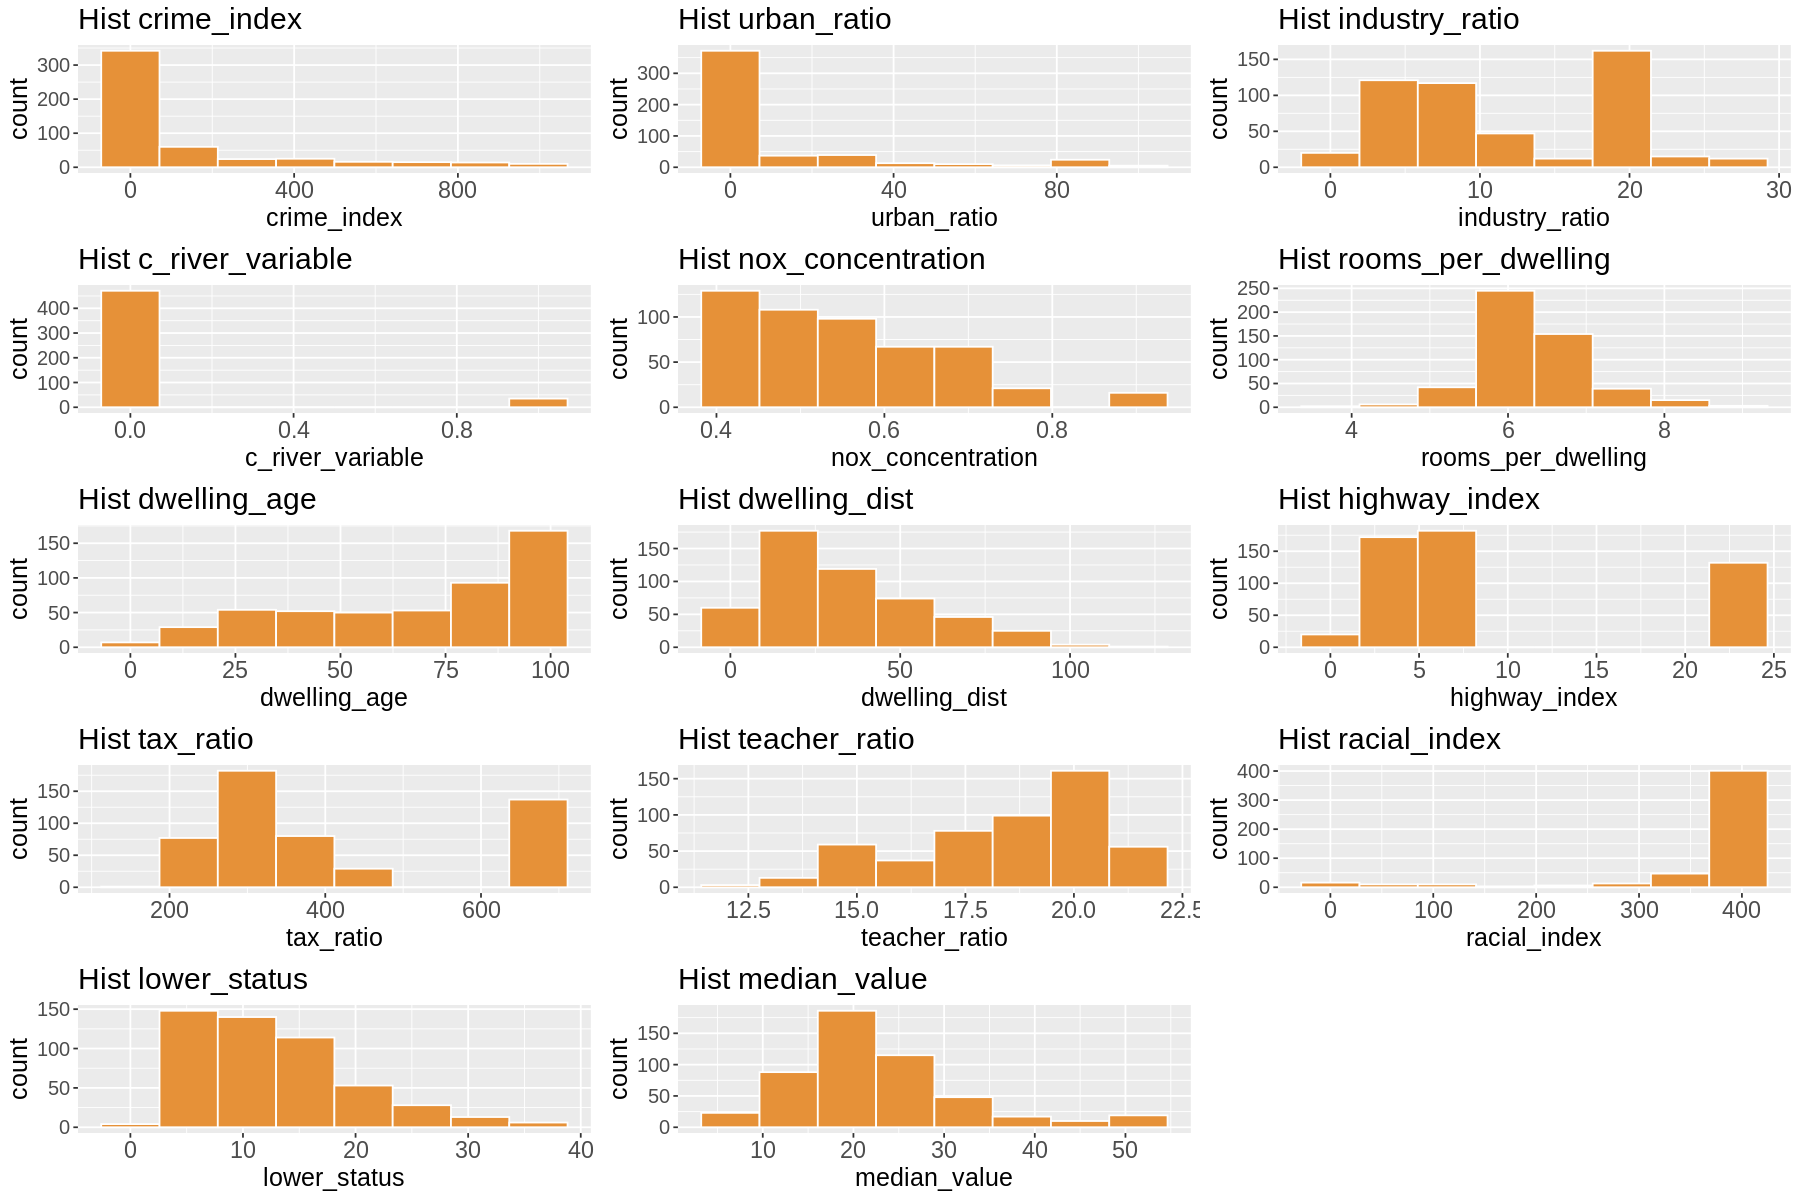

In [ ]:
grafics_histogram <- list()
variables_nume <- c("crime_index", "urban_ratio", "industry_ratio", "c_river_variable",
                         "nox_concentration", "rooms_per_dwelling", "dwelling_age",
                         "dwelling_dist", "highway_index", "tax_ratio", "teacher_ratio",
                         "racial_index", "lower_status", "median_value")
var_data <- colnames(data_boston[, variables_nume])

for (variable in var_data) {
  grafico <- ggplot(data_boston) +
    aes_string(x = variable) +
    geom_histogram(bins = 8, fill = '#e69138', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) +
    labs(title = paste('Hist', variable))

  grafics_histogram[[length(grafics_histogram) + 1]] <- grafico
}

options(
  repr.plot.width = 15,
  repr.plot.height = 10
)

do.call('grid.arrange', c(grafics_histogram, ncol = 3))

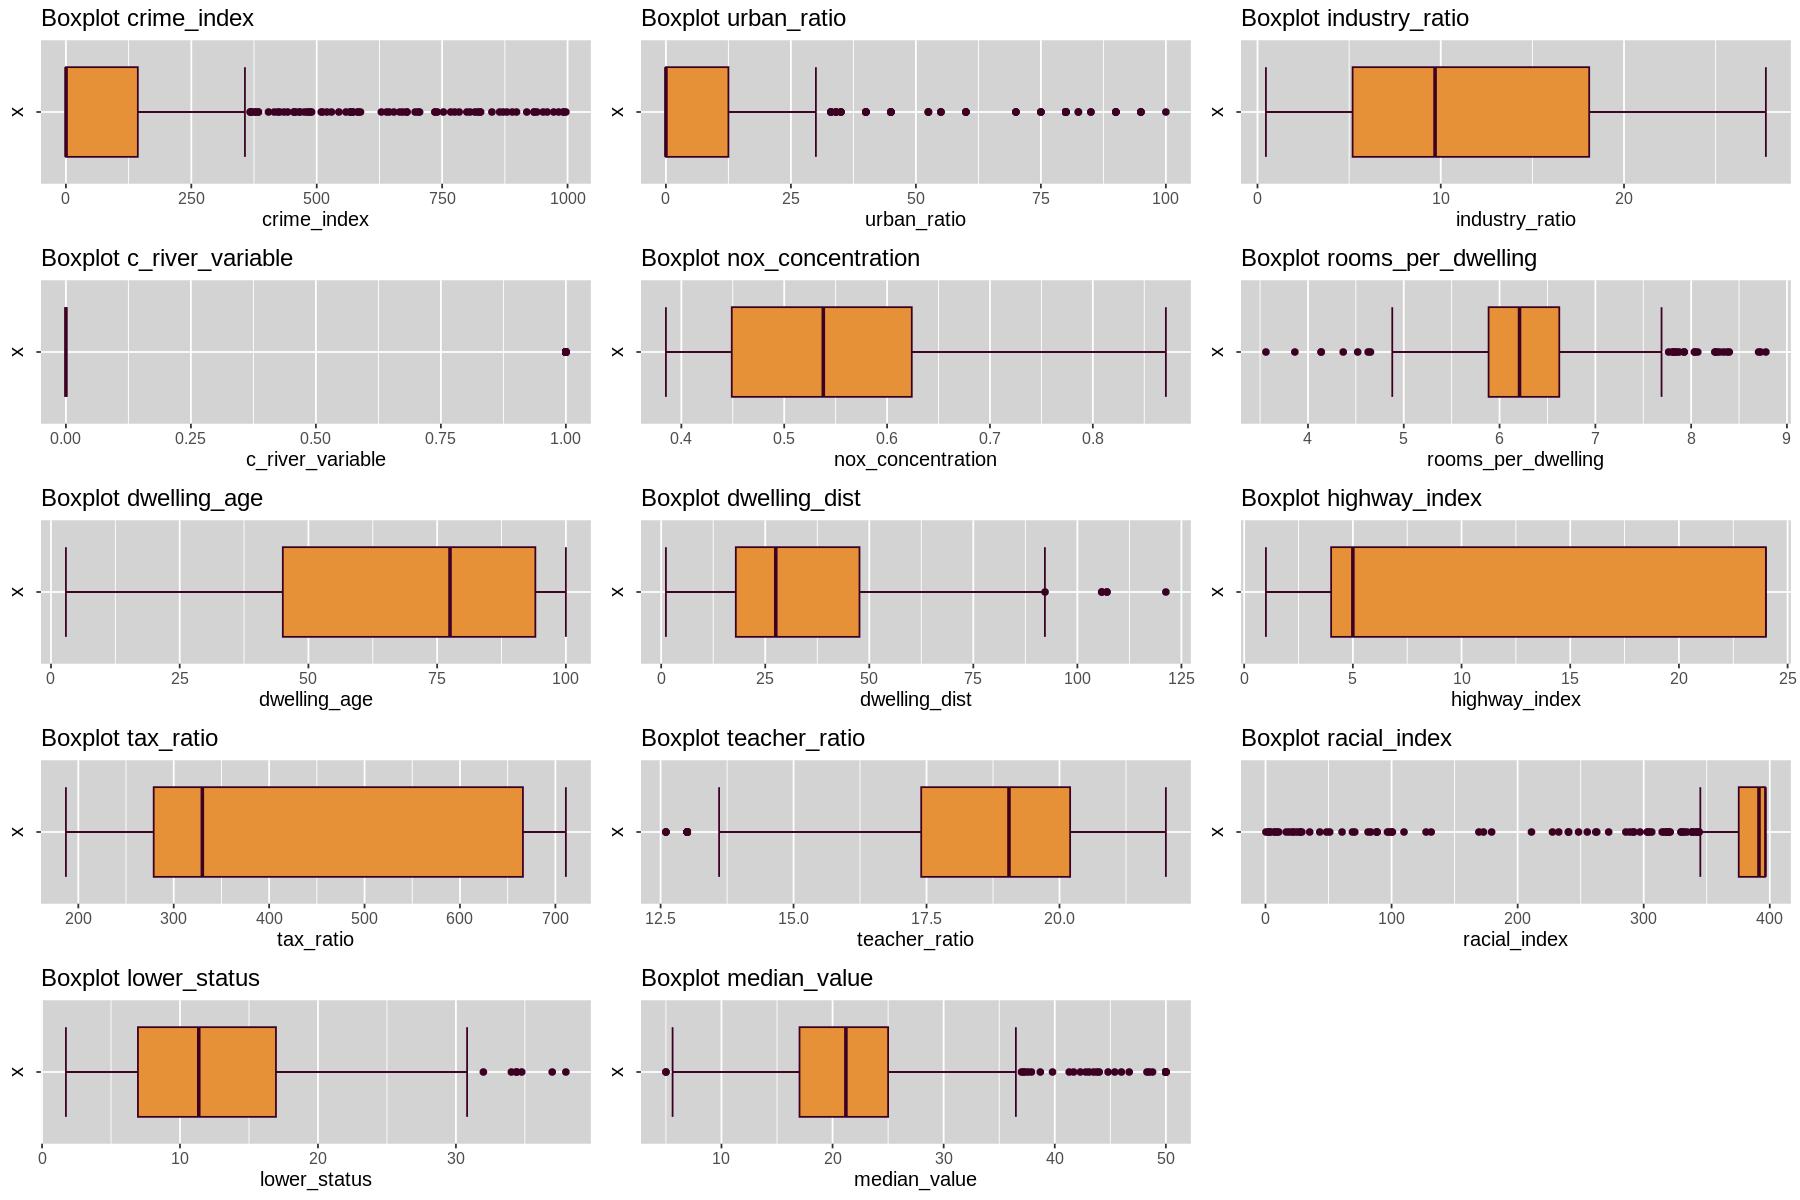

In [ ]:
box_plots <- list()

var_data <- colnames(data_boston[, variables_nume])

for (variable in var_data) {
  box_plot <- ggplot(data_boston, aes(x = '', y = !!sym(variable))) +
    stat_boxplot(geom = 'errorbar', color = '#3c0023', na.rm = TRUE) +
    geom_boxplot(fill = '#e69138', color = '#3c0023', na.rm = TRUE) +
    coord_flip() +
    labs(title = paste('Boxplot', variable), y = variable) +
    theme(panel.background = element_rect(fill = 'lightgray'),
          panel.grid.major = element_line(color = 'white'),
          panel.grid.minor = element_line(color = 'white')) +
    theme(text = element_text(size = 12))
  box_plots[[variable]] <- box_plot
}

options(
  repr.plot.width = 15,
  repr.plot.height = 10
)
grid.arrange(grobs = box_plots, ncol = 3, widths = rep(2, 3))

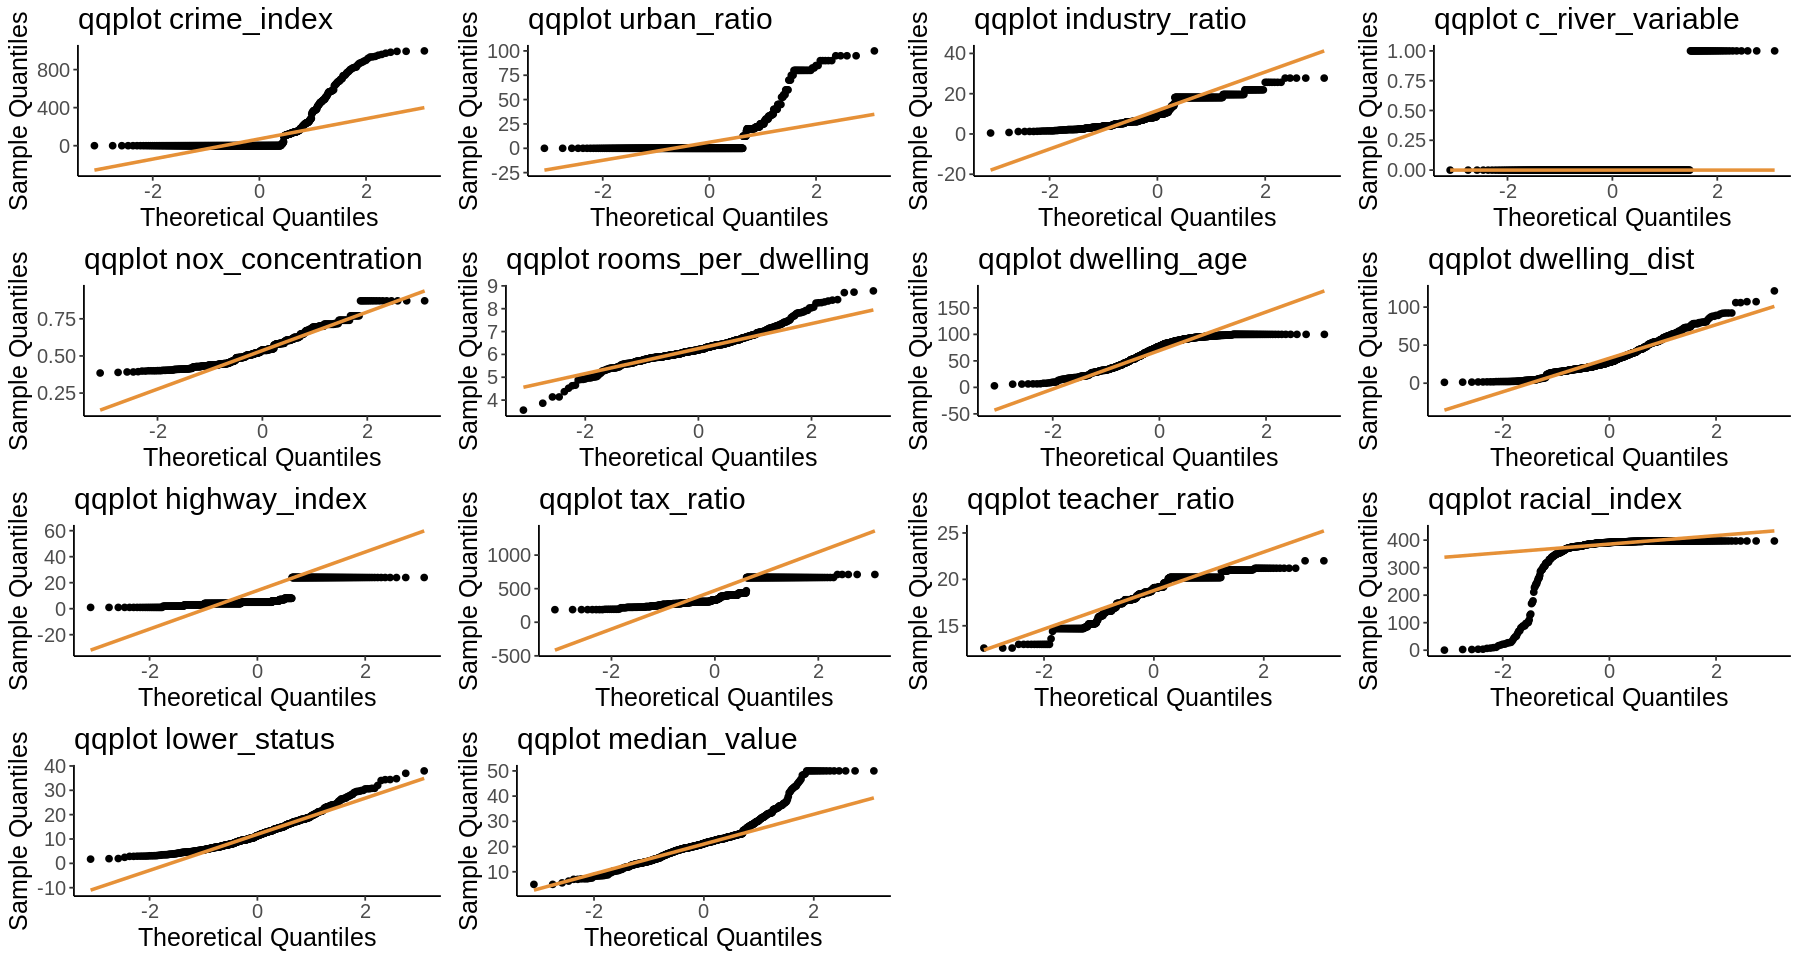

In [ ]:
options(repr.plot.width = 15,repr.plot.height = 8)
qq_plots <- list()
var_data <- colnames(data_boston[, variables_nume])

for (i in seq_along(var_data)) {
  variable <- var_data[i]
  qq_plot <- ggplot(data_boston[!is.na(data_boston[[variable]]), ],aes(sample = !!sym(variable))) +
    stat_qq() +
    stat_qq_line(color ='#e69138', lwd = 1) +
    labs(title = paste('qqplot', variable),
         x = 'Theoretical Quantiles',
         y = 'Sample Quantiles') +
    theme_classic() +
    theme(text = element_text(size = 15))
  qq_plots[[i]] <- qq_plot
}

grid.arrange(grobs = qq_plots, ncol = 4, widths = rep(2, 4))

Les variables **crime_index** i **urban_ratio** tenen una amplia variabilitat amb alguns valors que semblen ser outliers. Els valors més baixos són propers a zero, però la mitjana és notablement superior, indicant una certa variabilitat en tots dos casos.

La variable **c_river_variable** sembla tenir molts valors zero i podria ser una variable binària. La majoria d'observacions són 0, i la mitjana és baixa.

La variable **rooms_per_dwelling** segueix una distribucio normal tot i tenir alguns outliers.

En general, les dades no suggereixen una distribució normal, amb moltes variables que contenen outliers.

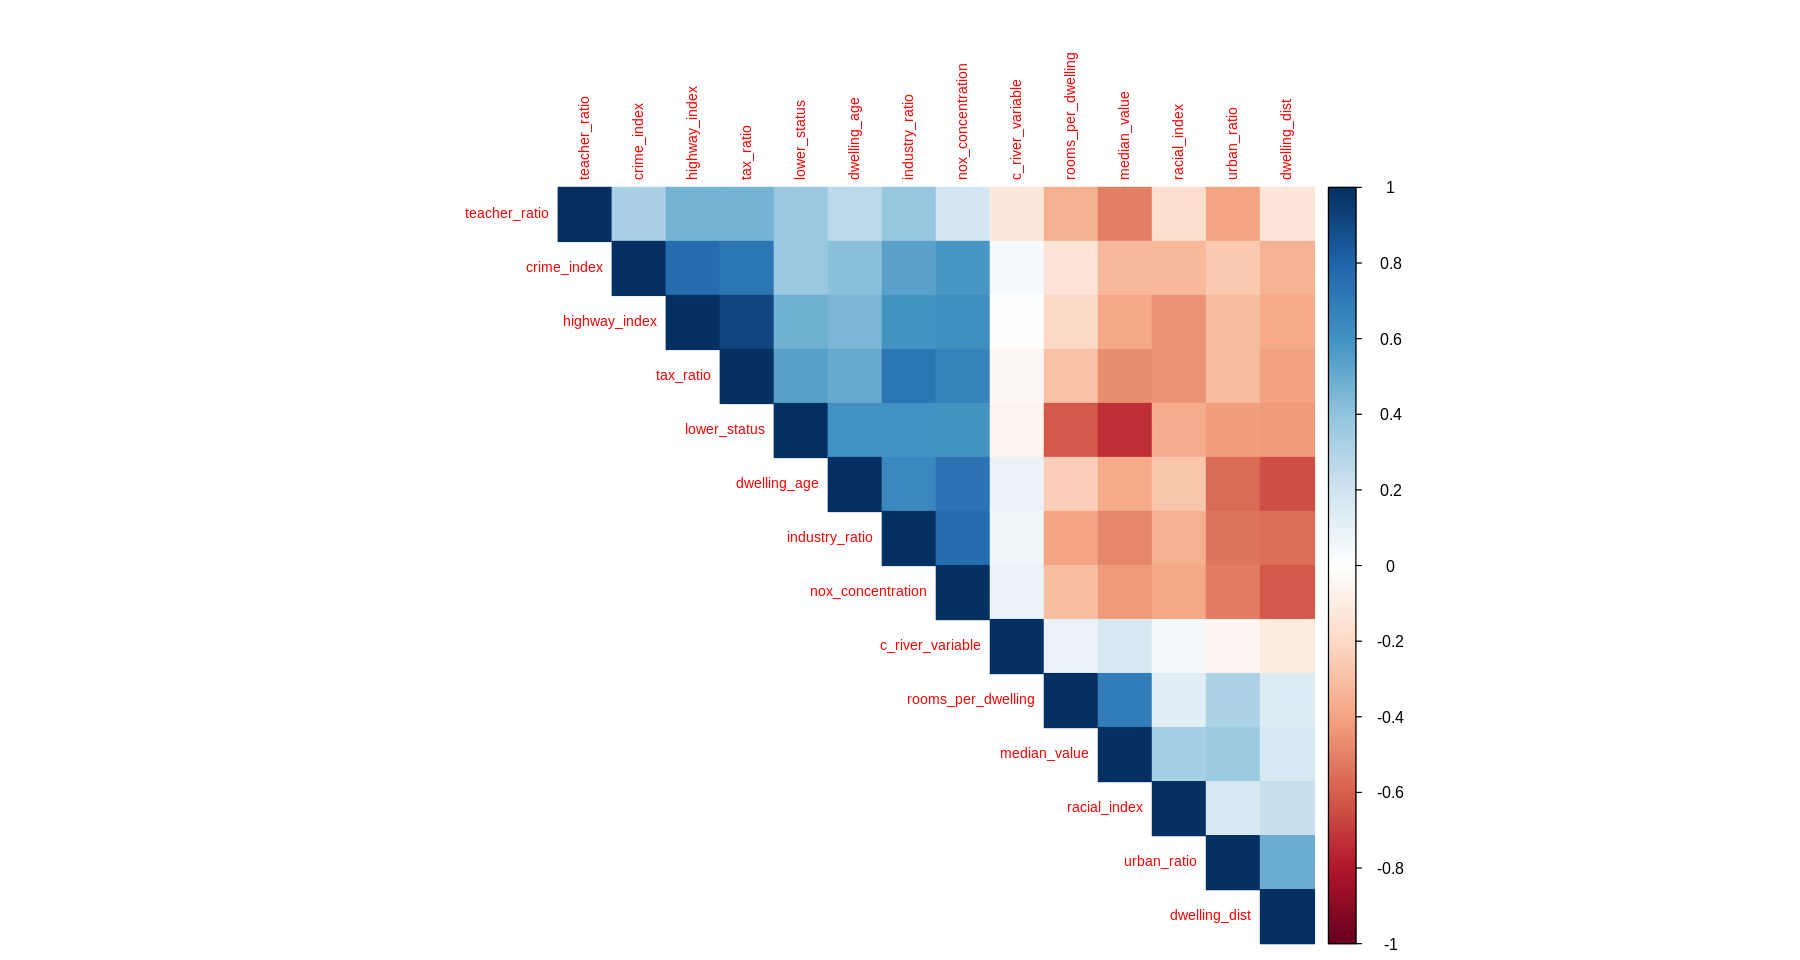

In [ ]:
cor_matrix <- cor(data_boston_num)
corrplot(cor_matrix, method = "color", type = "upper", order = "hclust", tl.cex = 0.7)


In [ ]:
outliers <- boxplot(data_boston_num, plot = FALSE)$out
outlier_indices <- apply(data_boston_num, 2, function(x) x %in% outliers)
outlier_count <- colSums(outlier_indices)

outlier_count


crime_index        urban_ratio     industry_ratio   c_river_variable 
                79                 68                  0                 35 
 nox_concentration rooms_per_dwelling       dwelling_age      dwelling_dist 
                 0                 30                 62                  5 
     highway_index          tax_ratio      teacher_ratio       racial_index 
                20                  0                 15                 76 
      lower_status       median_value 
                10                 40

Les tres variables amb més outliers són:

**crime_index**: 79 outliers
**urban_ratio**: 68 outliers
**racial_index**: 76 outliers

Aquestes variables tenen una quantitat significativa d'observacions que es desvien de la resta.

## 2. Análisis de correlación y de componentes principales (3p):
Se valorará principalmente la interpretación de dichos análisis así como la “limpieza” de la presentación
  

Análisis de correlación

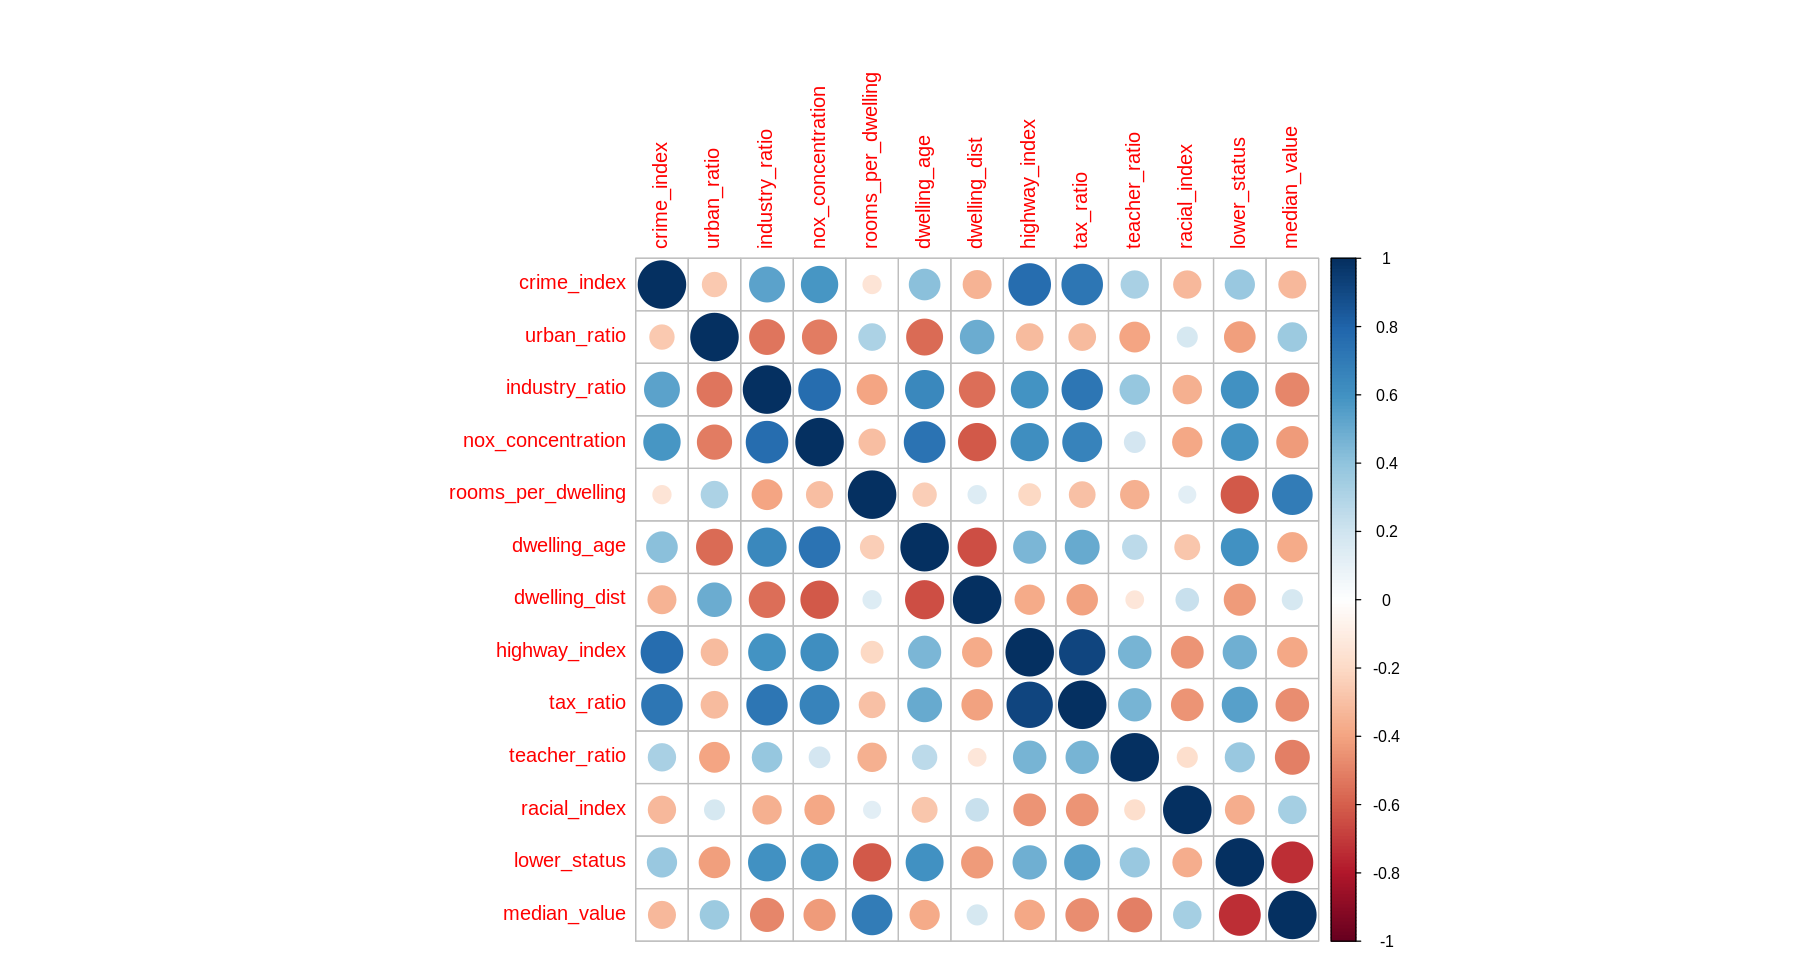

In [ ]:
variables_numericas_all <- c("crime_index", "urban_ratio", "industry_ratio", "c_river_variable",
                         "nox_concentration", "rooms_per_dwelling", "dwelling_age",
                         "dwelling_dist", "highway_index", "tax_ratio", "teacher_ratio",
                         "racial_index", "lower_status", "median_value")

variables_numericas <- c("crime_index", "urban_ratio", "industry_ratio",
                         "nox_concentration", "rooms_per_dwelling", "dwelling_age",
                         "dwelling_dist", "highway_index", "tax_ratio", "teacher_ratio",
                         "racial_index", "lower_status", "median_value")

cor_matrix_boston <- cor(data_boston[, variables_numericas])
corrplot::corrplot(cor_matrix_boston, method = "circle")

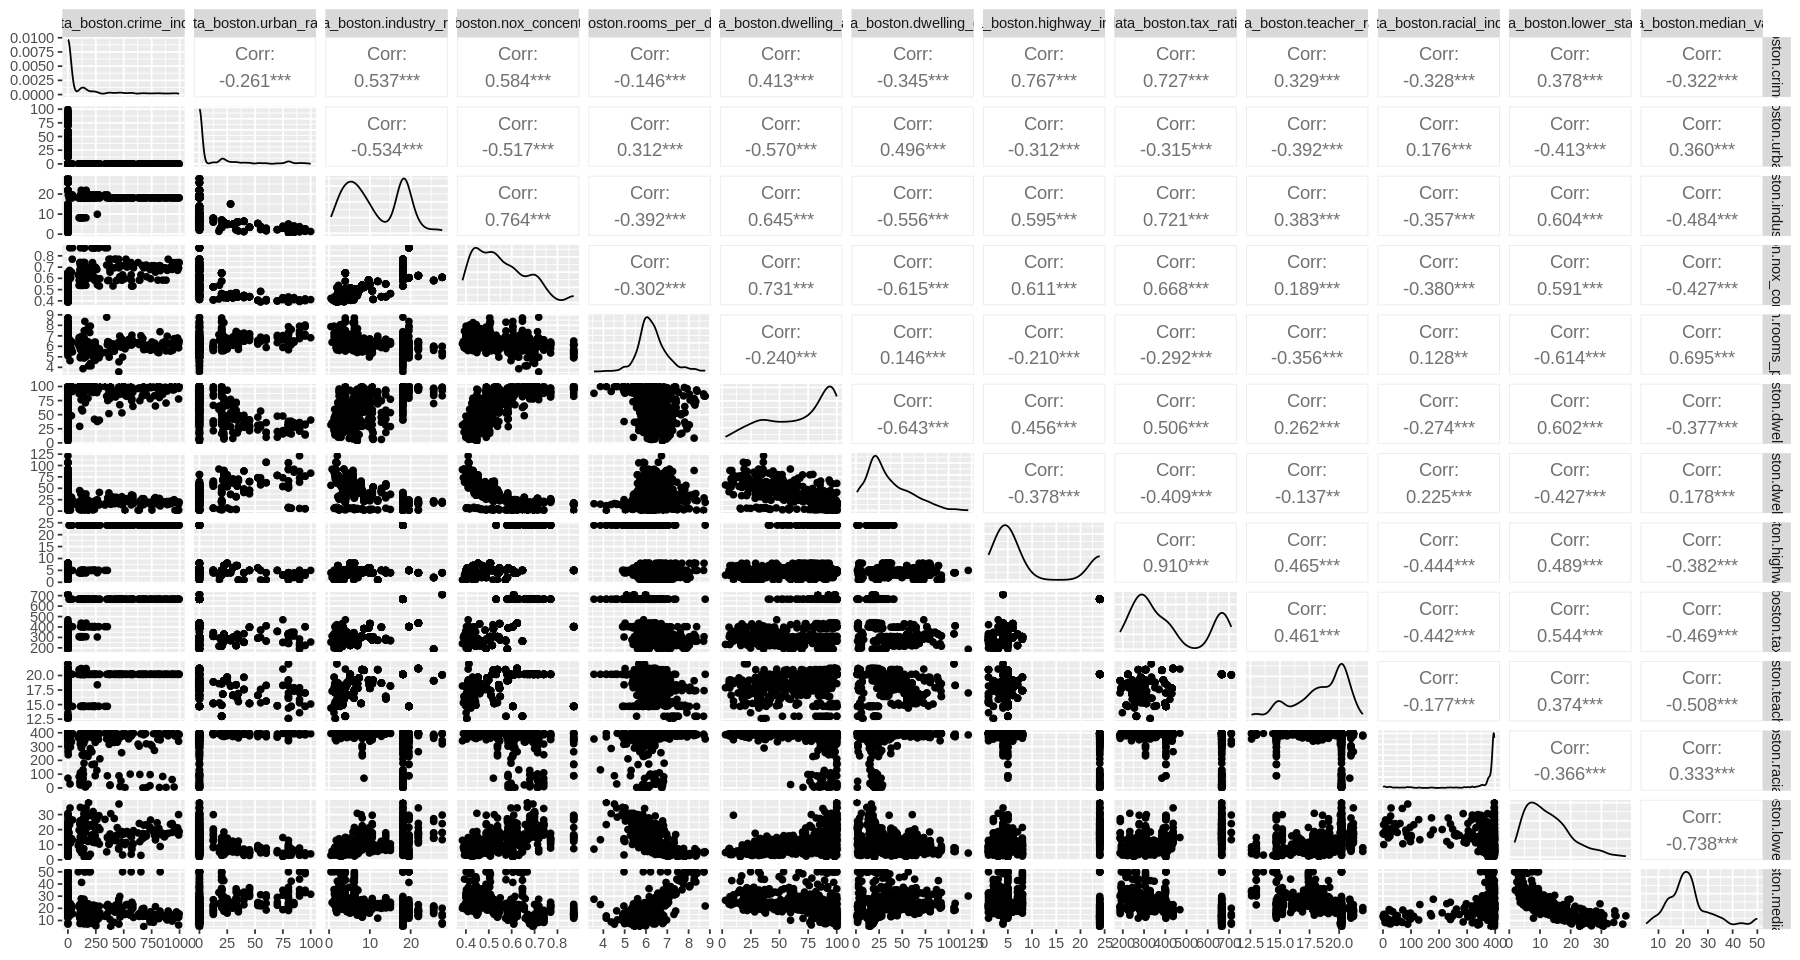

In [ ]:
data_boston_key <- data.frame(
  data_boston$crime_index,
  data_boston$urban_ratio,
  data_boston$industry_ratio,
  data_boston$nox_concentration,
  data_boston$rooms_per_dwelling,
  data_boston$dwelling_age,
  data_boston$dwelling_dist,
  data_boston$highway_index,
  data_boston$tax_ratio,
  data_boston$teacher_ratio,
  data_boston$racial_index,
  data_boston$lower_status,
  data_boston$median_value
)
ggpairs(data_boston_key)

In [ ]:
cor_matrix_boston <- cor(data_boston[, variables_numericas])
# Filtrar > a 0.7
cor_filter <- cor_matrix_boston[abs(cor_matrix_boston) > 0.7 & abs(cor_matrix_boston) < 1]
print(cor_filter)

 [1]  0.7673517  0.7271603  0.7636514  0.7207602  0.7636514  0.7314701
 [7]  0.7314701  0.7673517  0.9102282  0.7271603  0.7207602  0.9102282
[13] -0.7376627 -0.7376627


Covariance Matrix:

Correlation Matrix:


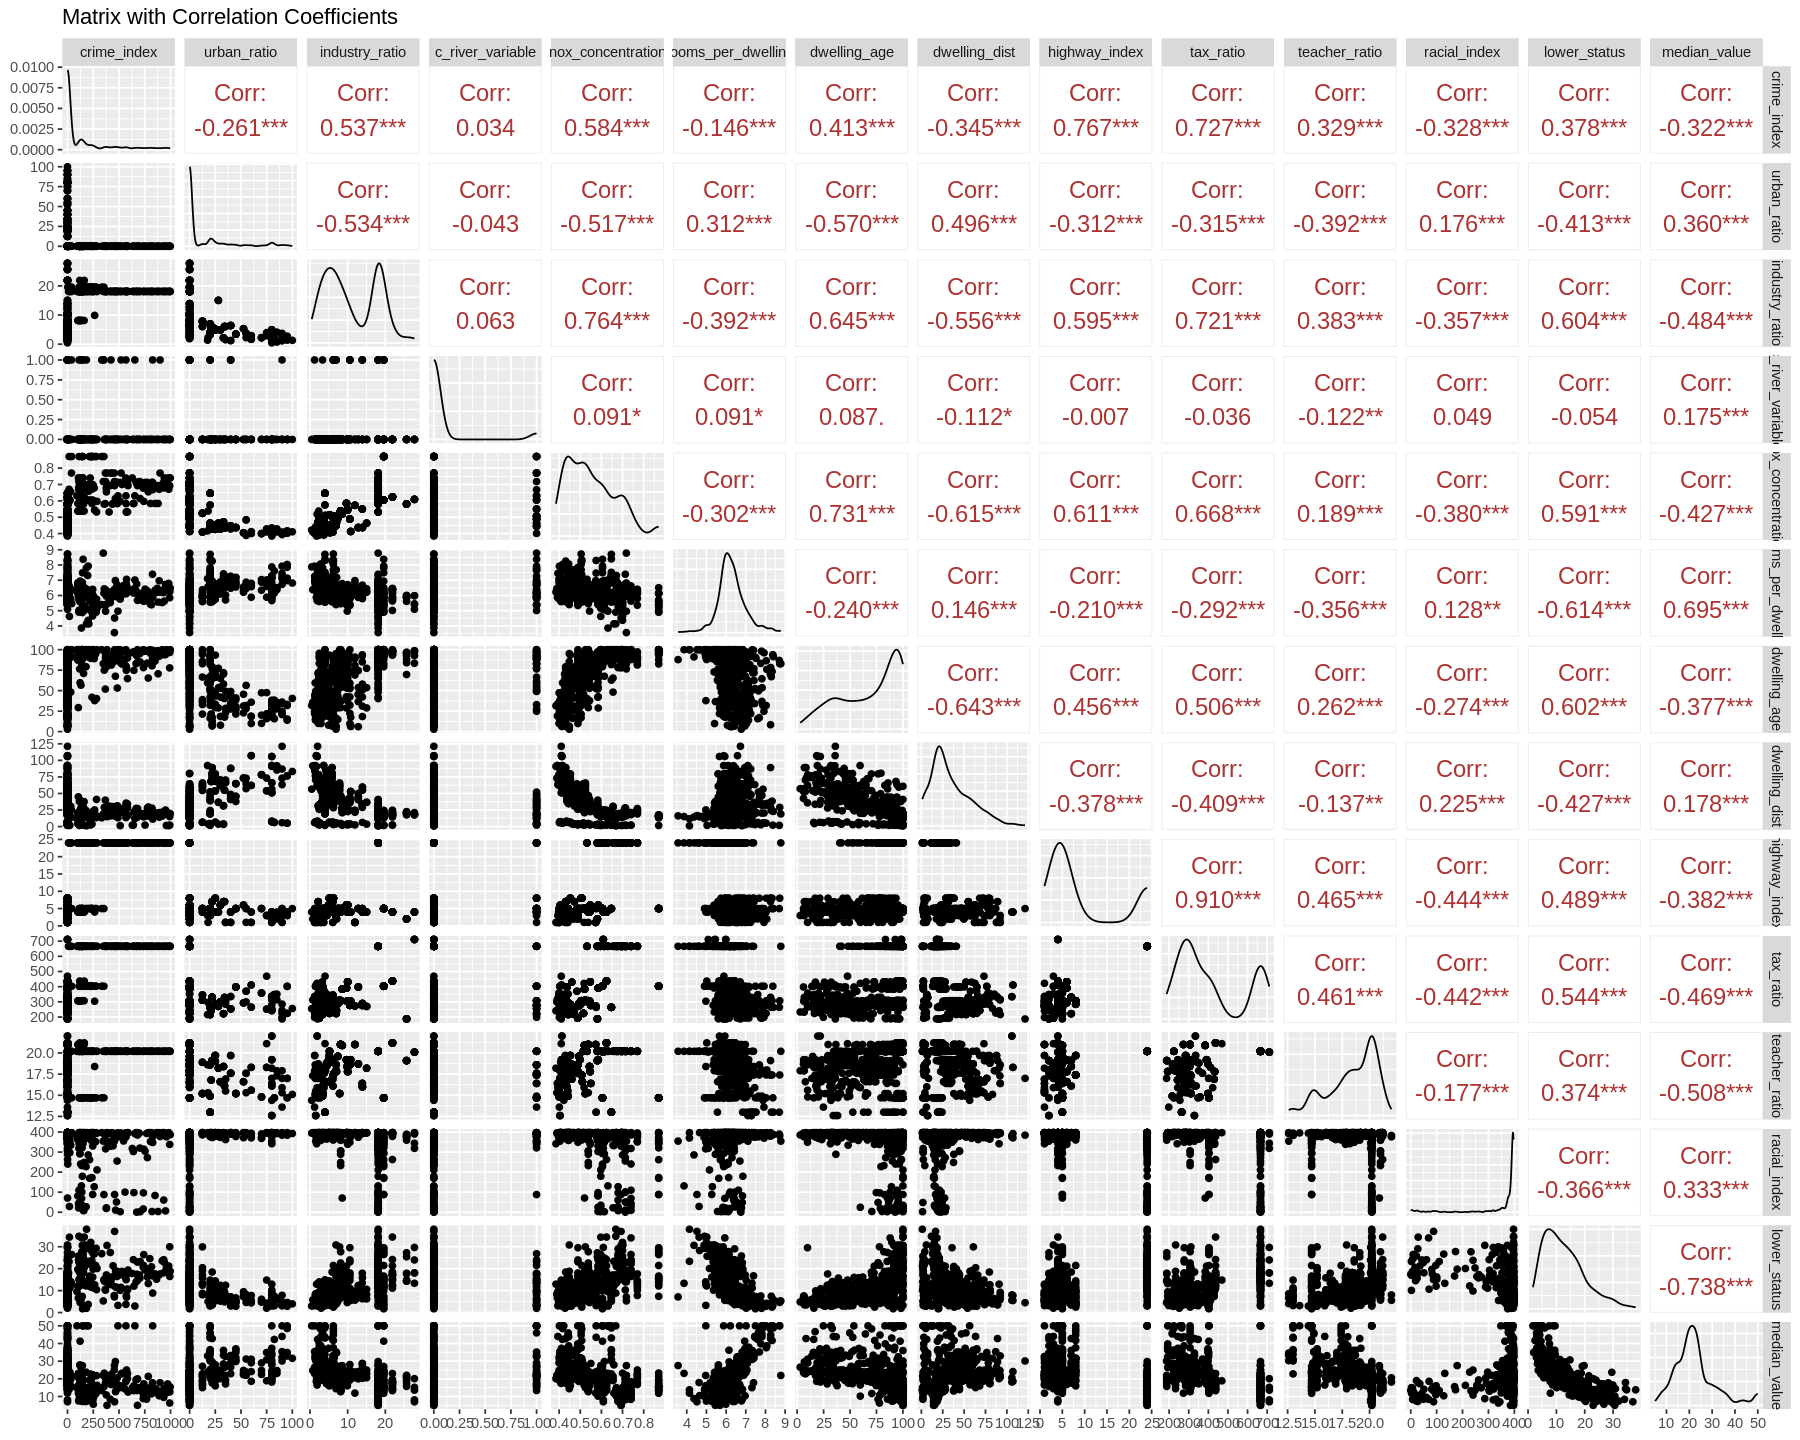

In [ ]:
cov_matrix <- cov(data_boston_num)
cor_matrix <- cor(data_boston_num)

cat("Covariance Matrix:\n")
#print(round(cov_matrix, 3))

cat("\nCorrelation Matrix:\n")
#print(round(cor_matrix, 3))

options(repr.plot.width = 15, repr.plot.height = 12)

ggpairs(
  data_boston_num,
  title = "Matrix with Correlation Coefficients",
  upper = list(continuous = wrap("cor", size = 5, color ='#ad3232'))
)


In [ ]:
cor_matrix_boston <- cor(data_boston_key)

# Top 10
top_correlations <- as.data.frame(as.table(cor_matrix_boston))
top_correlations <- top_correlations[order(-abs(top_correlations$Freq)), ]
print(top_correlations)
top_correlations <- top_correlations[14:23, ]

variables_top_correlations <- unique(c(top_correlations$Var1, top_correlations$Var2))
data_boston_top_corr <- data_boston[, variables_top_correlations]

                              Var1                           Var2       Freq
1          data_boston.crime_index        data_boston.crime_index  1.0000000
15         data_boston.urban_ratio        data_boston.urban_ratio  1.0000000
29      data_boston.industry_ratio     data_boston.industry_ratio  1.0000000
43   data_boston.nox_concentration  data_boston.nox_concentration  1.0000000
57  data_boston.rooms_per_dwelling data_boston.rooms_per_dwelling  1.0000000
71        data_boston.dwelling_age       data_boston.dwelling_age  1.0000000
85       data_boston.dwelling_dist      data_boston.dwelling_dist  1.0000000
99       data_boston.highway_index      data_boston.highway_index  1.0000000
113          data_boston.tax_ratio          data_boston.tax_ratio  1.0000000
127      data_boston.teacher_ratio      data_boston.teacher_ratio  1.0000000
141       data_boston.racial_index       data_boston.racial_index  1.0000000
155       data_boston.lower_status       data_boston.lower_status  1.0000000

l'anàlisi de les correlacions entre les variables del conjunt de dades revela diverses relacions significatives. Destaquen especialment les fortes correlacions positives, com ara la relació entre la taxa d'impostos (**tax_ratio**) i l'índex de carreteres (**highway_index**) (0.91), també l'índex de carreteres (**highway_index**) amb (**crime_index**) (0.77), així com la correlació entre la concentració de òxids de nitrogen (**nox_concentration**) i la proporció industrial (**industry_ratio**)(0.76).

D'altra banda, les correlacions negatives notables inclouen la relació entre el valor mitjà de les vivendes (**median_value**) i l'estatus socioeconòmic més baix (**lower_status**)  (-0.74), així com la relació entre la distància entre les vivendes (**dwelling_dist**) i l'edat de les mateixes (**dwelling_age**)(-0.64).

## PCA

In [ ]:
Variables_num <- c("crime_index", "industry_ratio",
                         "nox_concentration", "rooms_per_dwelling", "dwelling_age",
                         "dwelling_dist", "highway_index", "tax_ratio", "teacher_ratio",
                          "lower_status", "median_value")
data_boston_cor <- data_boston[, Variables_num]

cor_matrix_boston <- cor(data_boston_cor)

cat("\nCorrelation Matrix:\n")
print(round(cor_matrix_boston, 2))

# PCA
acp <- princomp(data_boston_cor, cor = TRUE)
summary(acp)



Correlation Matrix:
                   crime_index industry_ratio nox_concentration
crime_index               1.00           0.54              0.58
industry_ratio            0.54           1.00              0.76
nox_concentration         0.58           0.76              1.00
rooms_per_dwelling       -0.15          -0.39             -0.30
dwelling_age              0.41           0.64              0.73
dwelling_dist            -0.35          -0.56             -0.62
highway_index             0.77           0.60              0.61
tax_ratio                 0.73           0.72              0.67
teacher_ratio             0.33           0.38              0.19
lower_status              0.38           0.60              0.59
median_value             -0.32          -0.48             -0.43
                   rooms_per_dwelling dwelling_age dwelling_dist highway_index
crime_index                     -0.15         0.41         -0.35          0.77
industry_ratio                  -0.39         0.64   

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.4243395 1.2520885 1.0966783 0.79320962 0.62331306
Proportion of Variance 0.5343111 0.1425205 0.1093367 0.05719832 0.03531993
Cumulative Proportion  0.5343111 0.6768316 0.7861683 0.84336657 0.87868650
                           Comp.6     Comp.7     Comp.8     Comp.9   Comp.10
Standard deviation     0.60292482 0.54704378 0.49808906 0.44689061 0.4001519
Proportion of Variance 0.03304712 0.02720517 0.02255388 0.01815557 0.0145565
Cumulative Proportion  0.91173362 0.93893879 0.96149268 0.97964824 0.9942047
                           Comp.11
Standard deviation     0.252483280
Proportion of Variance 0.005795255
Cumulative Proportion  1.000000000

In [ ]:
print('Standard deviation of component 1:')
sd(predict(acp)[, 1:1])

print('Variance of component 1:')
var(predict(acp)[, 1:1])

[1] "Standard deviation of component 1:"


[1] 2.426739

[1] "Variance of component 1:"


[1] 5.88906

In [ ]:
# Scores on the principal components
predict(acp)

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11
-1.73486005,0.8492196,-1.4248876,0.1565078,-0.49298656,1.038616279,0.22918535,0.272629197,-0.987961759,0.52916244,0.266598372
-1.55871038,-0.4997123,-0.4574990,-0.1839973,0.69929696,-0.060297391,0.44725641,-0.185704418,0.001151827,0.48550011,-0.157119410
-2.61920884,0.9054614,0.1011141,-0.5357541,0.35099766,-0.410379442,0.29098582,-0.123002966,0.210766332,-0.02957801,-0.035317643
-3.05650168,0.3054823,0.7707924,-0.5081952,0.33305989,-0.134017518,0.39179476,-0.284749742,-0.157929999,-0.35875987,-0.025605097
-2.98564097,0.5321137,0.6214423,-0.6214597,0.62599904,-0.084737264,0.25018790,-0.443904637,0.142158361,-0.50131417,0.036646692
-2.49529446,-0.4125811,0.4109247,-0.3311737,0.38692446,0.009138184,0.53541271,-0.634146253,-0.202427069,-0.10018562,-0.068223733
-1.32272577,-0.4535786,-0.6844337,1.3039961,0.37426031,-0.155225782,-0.06325394,-0.389609942,0.031335951,0.24062761,-0.126186031
-0.91130293,-0.2362378,-1.1660625,1.1244086,1.30240022,-0.057556908,-0.31485814,-0.962883045,0.730380604,0.06412668,-0.006778903
0.09817761,-1.6456340,-1.6381235,1.6136966,1.76200826,0.478253597,-0.60823813,-0.689448546,1.035245209,-0.04107612,-0.011278740
-0.88641898,-0.8736206,-0.8924330,1.4266104,1.25841171,-0.163924678,-0.12242692,-0.537922159,0.243899627,0.36137446,-0.139155820


In [ ]:
# Loadings of the principal components
loadings(acp)


Loadings:
                   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8
crime_index         0.294  0.250  0.368  0.258         0.332  0.656       
industry_ratio      0.351        -0.107        -0.244 -0.671         0.288
nox_concentration   0.344  0.211 -0.222  0.199        -0.273  0.190       
rooms_per_dwelling -0.213  0.562  0.144 -0.237  0.504        -0.175  0.525
dwelling_age        0.308  0.165 -0.372 -0.244  0.522         0.159 -0.490
dwelling_dist      -0.252 -0.296  0.428  0.345  0.497 -0.478        -0.225
highway_index       0.331  0.189  0.404                0.156 -0.374 -0.230
tax_ratio           0.354  0.139  0.315  0.120        -0.113 -0.406       
teacher_ratio       0.219 -0.289  0.391 -0.779                0.145       
lower_status        0.327 -0.274 -0.214  0.129  0.310  0.288 -0.371  0.104
median_value       -0.280  0.492        -0.109 -0.242 -0.102        -0.522
                   Comp.9 Comp.10 Comp.11
crime_index         0.305                
indus

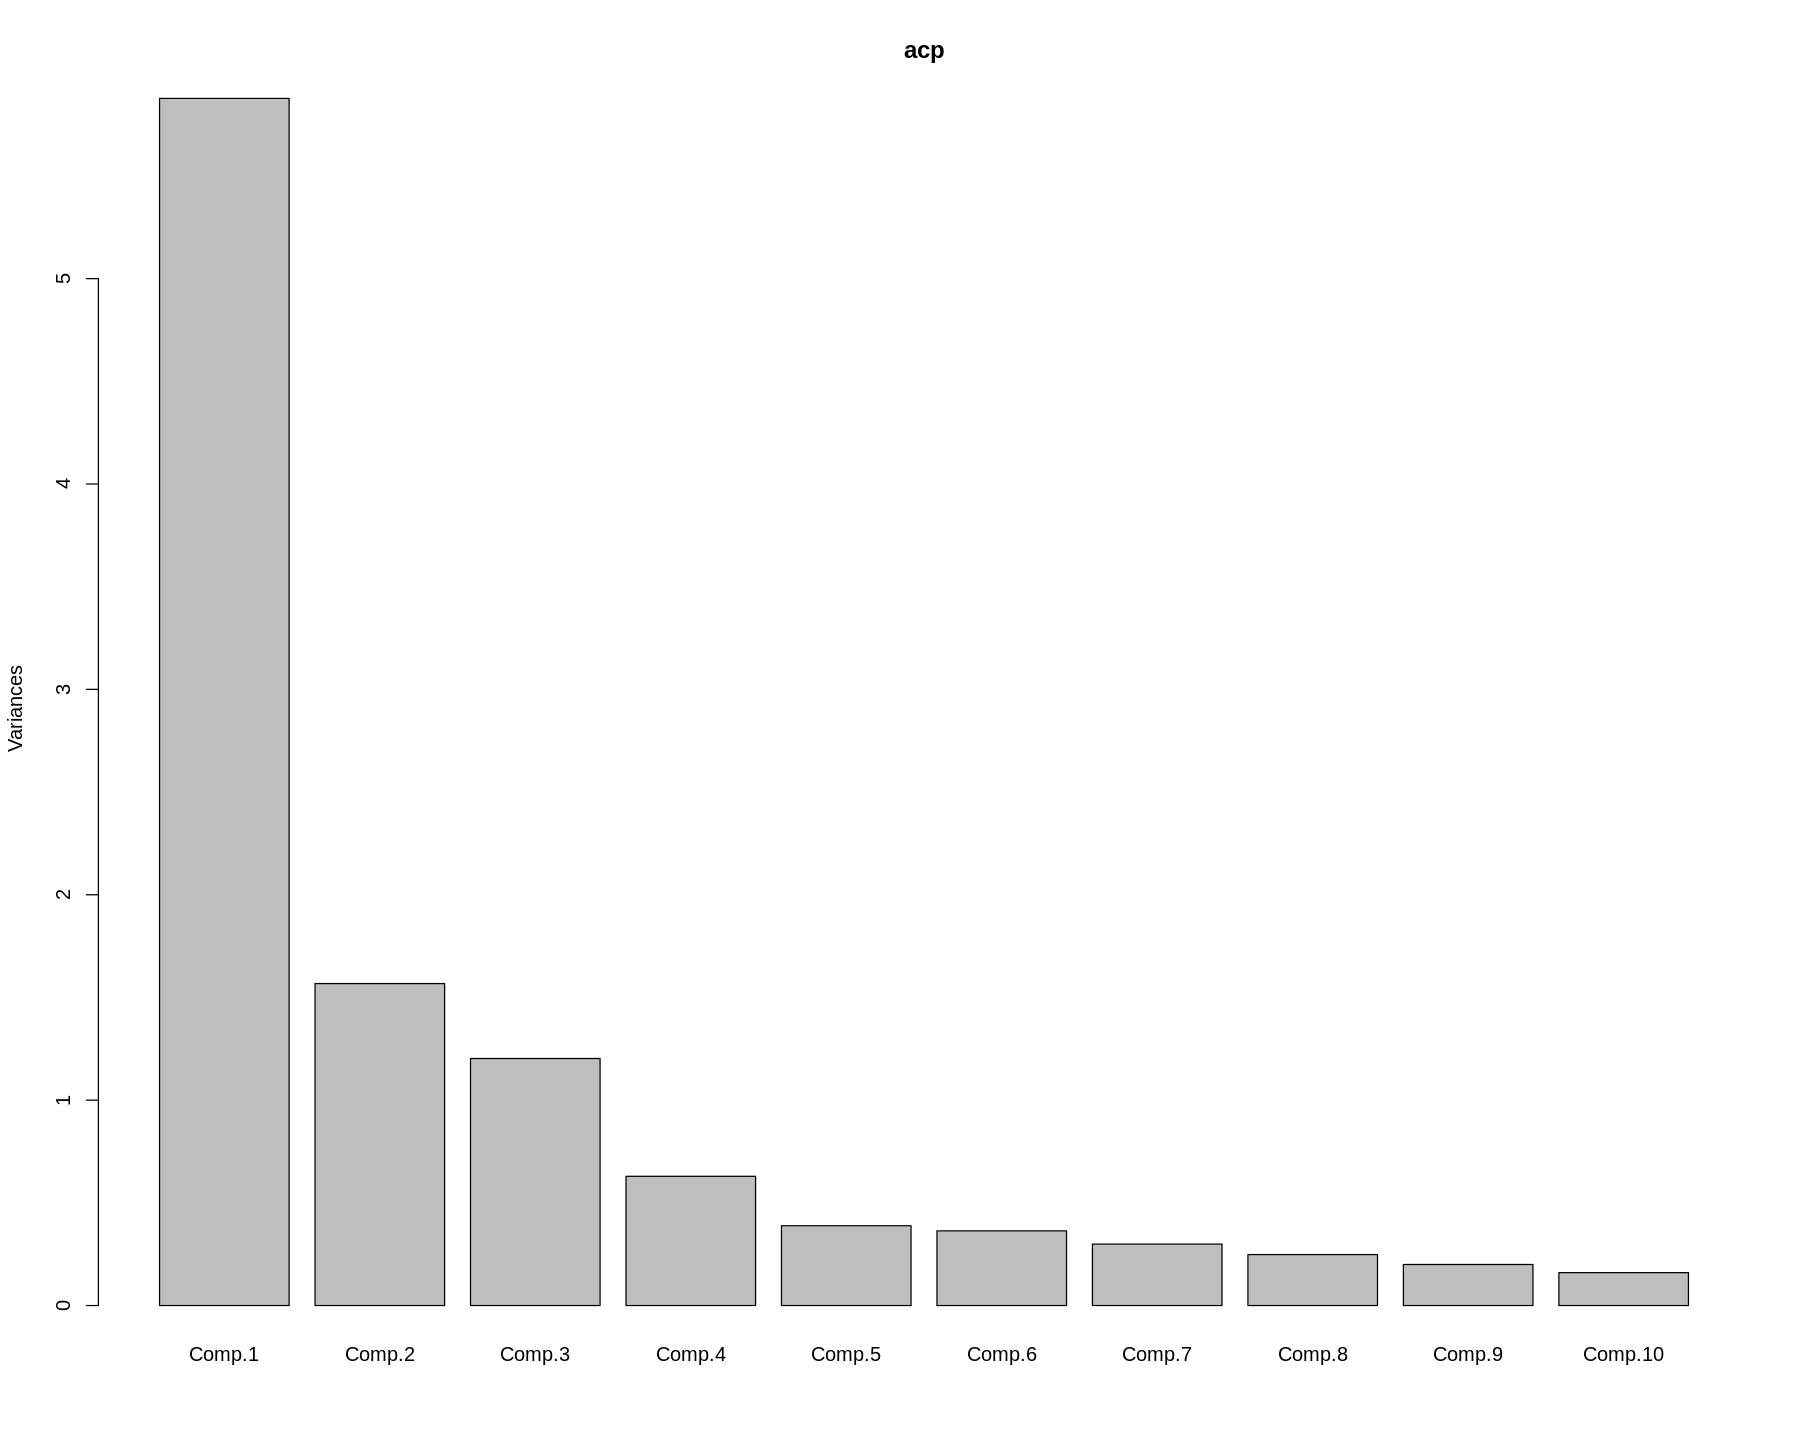

In [ ]:
# Principal component plot
plot(acp)

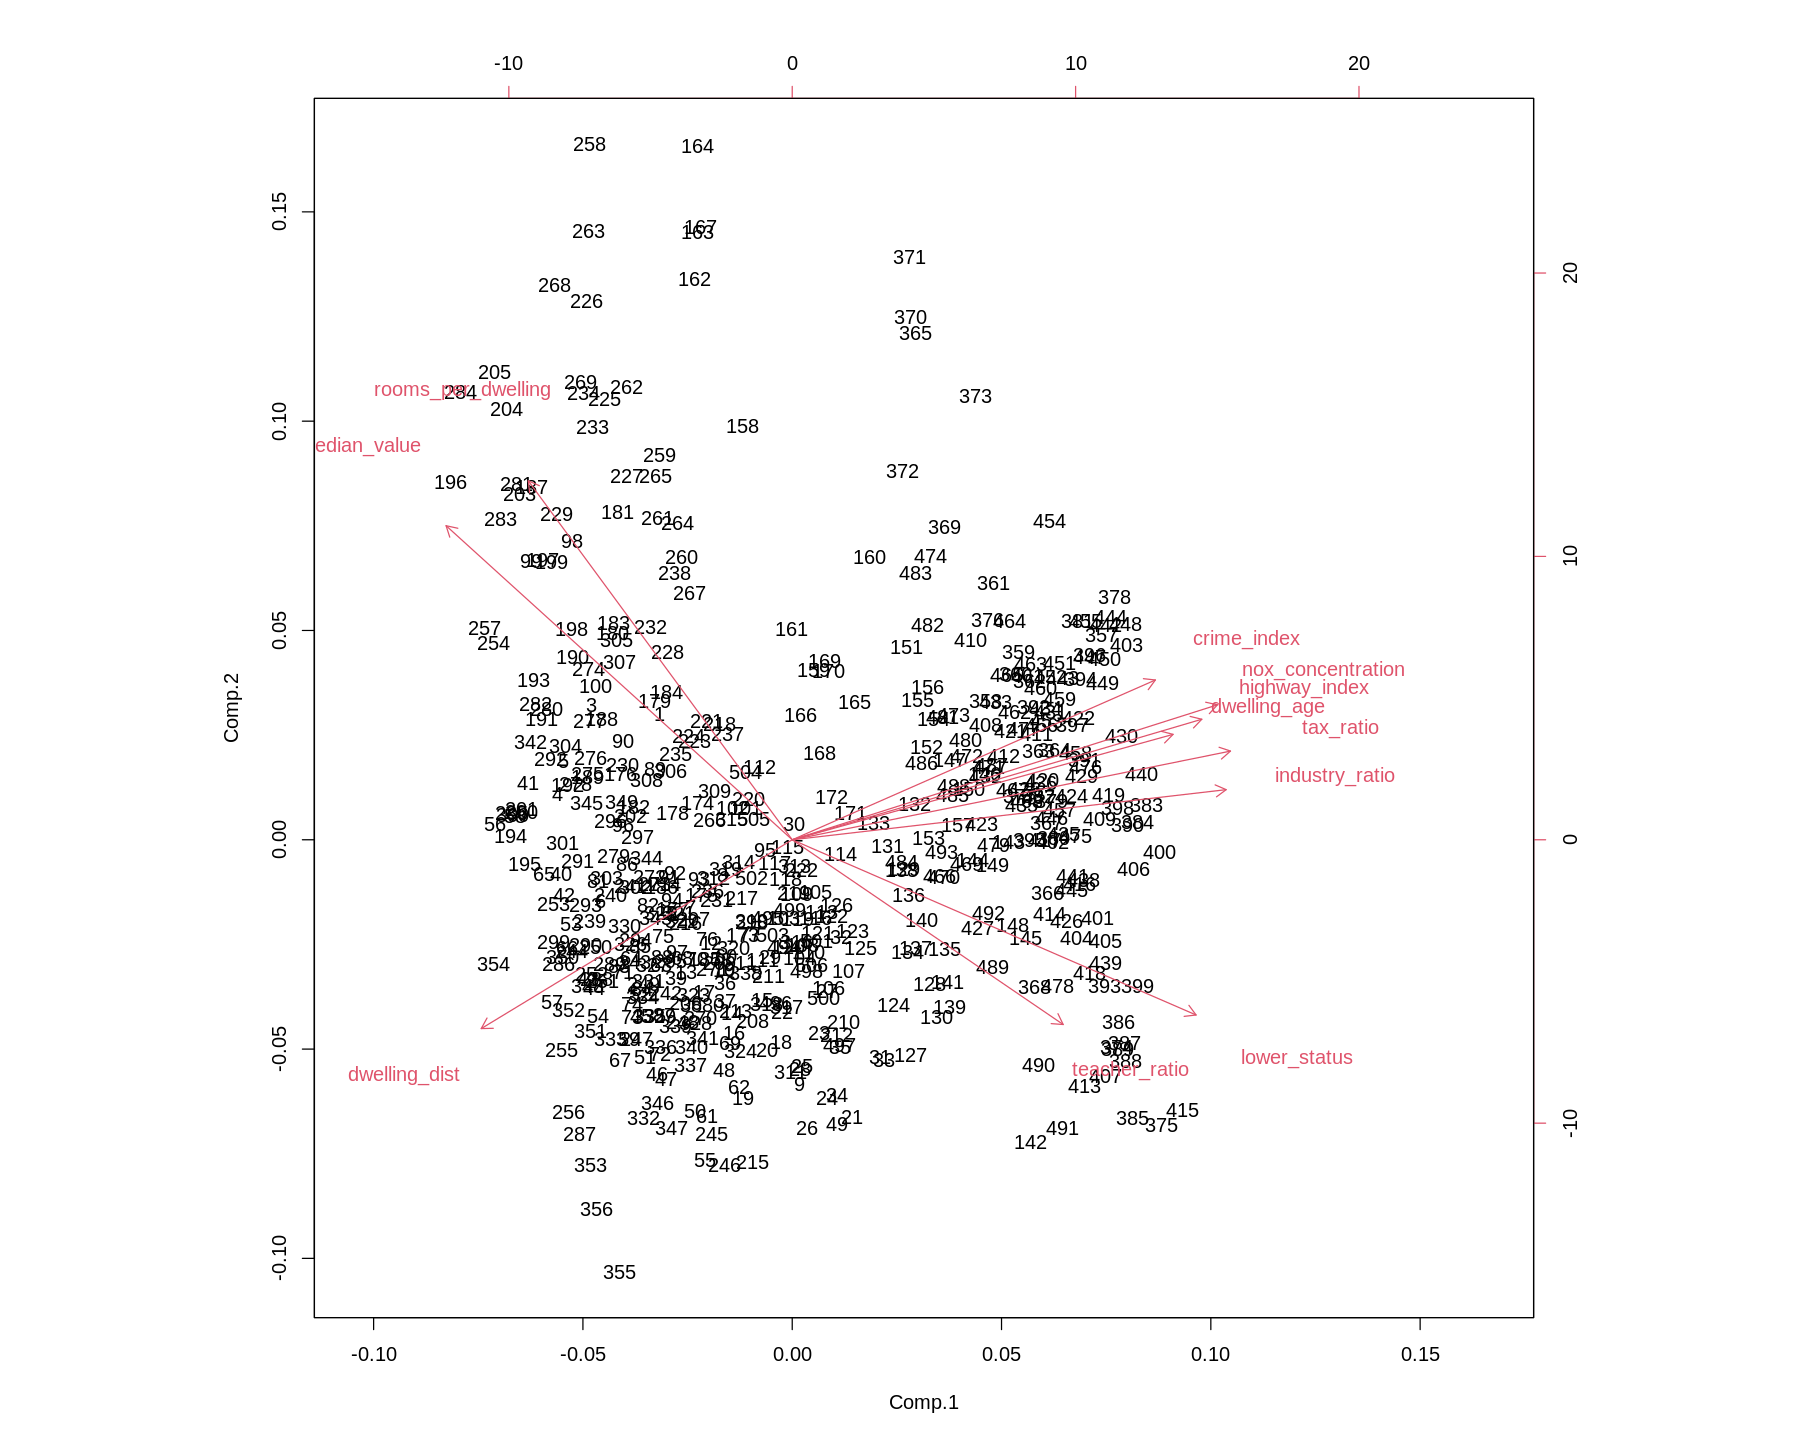

In [ ]:
# Biplot
biplot(acp)

In [ ]:
num_components <- length(acp$sdev)
print(paste("Number of components:", num_components))

[1] "Number of components: 11"


In [ ]:

percentatge_varianca <- cumsum(acp$sdev^2) / sum(acp$sdev^2)

percentatge_varianca_2 <- percentatge_varianca[2]
print(paste("Percentage of explained variance with two principal components:", round(percentatge_varianca_2 * 100, 2), "%"))

# Percentatge de variància explicada amb tres components principals
percentatge_varianca_3 <- percentatge_varianca[3]
print(paste("Percentage of explained variance with three principal components", round(percentatge_varianca_3 * 100, 2), "%"))



[1] "Percentage of explained variance with two principal components: 67.68 %"
[1] "Percentage of explained variance with three principal components 78.62 %"


 Variables highlighted n component

In [ ]:
highlighted_variables <- names(sort(abs(acp$loadings[, 1]), decreasing = TRUE)[1:3])
print(paste("Variables highlighted in the first principal component:", paste(highlighted_variables, collapse = ", ")))

highlighted_variables_2 <- names(sort(abs(acp$loadings[, 2]), decreasing = TRUE)[1:3])
print(paste("Variables highlighted in the second principal component:", paste(highlighted_variables_2, collapse = ", ")))

highlighted_variables_3 <- names(sort(abs(acp$loadings[, 3]), decreasing = TRUE)[1:3])
print(paste("Variables highlighted in the third principal component:", paste(highlighted_variables_3, collapse = ", ")))

[1] "Variables highlighted in the first principal component: tax_ratio, industry_ratio, nox_concentration"
[1] "Variables highlighted in the second principal component: rooms_per_dwelling, median_value, dwelling_dist"
[1] "Variables highlighted in the third principal component: dwelling_dist, highway_index, teacher_ratio"


In [ ]:
scores <- predict(acp)[, 1:2]
print("Scores on the first two components:")
print(head(scores))

[1] "Scores on the first two components:"
        Comp.1     Comp.2
[1,] -1.734860  0.8492196
[2,] -1.558710 -0.4997123
[3,] -2.619209  0.9054614
[4,] -3.056502  0.3054823
[5,] -2.985641  0.5321137
[6,] -2.495294 -0.4125811


En total tenim 11 components principals en aquest anàlisi, ja que son les mes represntatives que heobsrvat respecte la matriu de correlacio.

La primera component principal explica aproximadament el 53,4% de la variància total, i la segona component principal afegeix al voltant del 14,3%. En conjunt, les dues components expliquen al voltant del 67,7% de la variància. Si afegim la tercera component, aporta aproximadament un 10%,amb un total de 78,62%.

 Variance explained by components 1 and 2

In [ ]:
component_matrix <- cor(data_boston_cor, predict(acp)[, 1:2])
# Variance
explained_variance <- apply(component_matrix * component_matrix, 1, sum)
print(explained_variance)

       crime_index     industry_ratio  nox_concentration rooms_per_dwelling 
         0.6052206          0.7336967          0.7652443          0.7632045 
      dwelling_age      dwelling_dist      highway_index          tax_ratio 
         0.6004412          0.5089252          0.7009195          0.7687695 
     teacher_ratio       lower_status       median_value 
         0.4135245          0.7452277          0.8399738 


Variance explained by the first three components

In [ ]:
component_matrix <- cor(data_boston_cor, predict(acp)[, 1:3])
# Variance
explained_variance <- apply(component_matrix * component_matrix, 1, sum)
print(explained_variance)

       crime_index     industry_ratio  nox_concentration rooms_per_dwelling 
         0.7681113          0.7475928          0.8243888          0.7880844 
      dwelling_age      dwelling_dist      highway_index          tax_ratio 
         0.7666922          0.7293257          0.8974148          0.8883420 
     teacher_ratio       lower_status       median_value 
         0.5974519          0.8003673          0.8400794 


## 3. Análisis de ANOVA (2p):
Se valorará principalmente la interpretación del análisis, así como la limpieza de los datos


In [ ]:
data_boston_numeric <- data.frame(
  crime_index = data_boston$crime_index,
  urban_ratio = data_boston$urban_ratio,
  industry_ratio = data_boston$industry_ratio,
  c_river_variable = data_boston$c_river_variable,
  nox_concentration = data_boston$nox_concentration,
  rooms_per_dwelling = data_boston$rooms_per_dwelling,
  dwelling_age = data_boston$dwelling_age,
  dwelling_dist = data_boston$dwelling_dist,
  highway_index = data_boston$highway_index,
  tax_ratio = data_boston$tax_ratio,
  teacher_ratio = data_boston$teacher_ratio,
  racial_index = data_boston$racial_index,
  lower_status = data_boston$lower_status,
  median_value = data_boston$median_value
)

In [ ]:
numeric_variables <- c('crime_index', 'urban_ratio', 'industry_ratio', 'c_river_variable',
               'nox_concentration', 'rooms_per_dwelling', 'dwelling_age',
               'dwelling_dist', 'highway_index', 'tax_ratio', 'teacher_ratio',
               'racial_index', 'lower_status', 'median_value')

In [ ]:
results <- data.frame(Variable = character(), Shapiro = numeric(), PValue = numeric(), row.names = NULL)



# Shapiro normality test
for (variable in numeric_variables) {
  result = shapiro.test(data_boston_numeric[, variable])
  results = rbind(results, data.frame(Variable = variable, Shapiro = result$statistic, PValue = round(result$p.value, 3)))
}
print(results)

              Variable   Shapiro PValue
W          crime_index 0.6047289      0
W1         urban_ratio 0.5559467      0
W2      industry_ratio 0.8997939      0
W3    c_river_variable 0.2747607      0
W4   nox_concentration 0.9356360      0
W5  rooms_per_dwelling 0.9608723      0
W6        dwelling_age 0.8920133      0
W7       dwelling_dist 0.9335080      0
W8       highway_index 0.6796429      0
W9           tax_ratio 0.8152382      0
W10      teacher_ratio 0.9035974      0
W11       racial_index 0.4768233      0
W12       lower_status 0.9369061      0
W13       median_value 0.9171759      0


Com podem observar ek Pvalor de les dades es zero el que significa que les dades no segueixen una distribució norma. Es important tenir en compte per el test ANOVA, ja que assumeixen la normalitat de les dades.  

In [ ]:
transformed_data <- log(data_boston_numeric[, numeric_variables] + 1)
transformed_data

crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.006300113,2.944439,1.196948,0,0.4304829,2.024853,4.192680,1.627278,0.6931472,5.693732,2.791165,5.986201,1.788421,3.218876
0.026943735,0.000000,2.088153,0,0.3845819,2.004314,4.380776,3.925354,1.0986123,5.493061,2.933857,5.986201,2.316488,3.117950
0.026924267,0.000000,2.088153,0,0.3845819,2.102303,4.128746,3.925354,1.0986123,5.493061,2.933857,5.975919,1.615420,3.575151
0.031857130,0.000000,1.156881,0,0.3770656,2.079192,3.845883,4.121019,1.3862944,5.407172,2.980619,5.980479,1.371181,3.538057
0.066770404,0.000000,1.156881,0,0.3770656,2.097650,4.010963,4.121019,1.3862944,5.407172,2.980619,5.986201,1.845300,3.616309
0.029413161,0.000000,1.156881,0,0.3770656,2.005526,4.089332,4.121019,1.3862944,5.407172,2.980619,5.979190,1.826161,3.391147
0.084607657,2.602690,2.182675,0,0.4213385,1.947623,4.213608,4.036097,1.7917595,5.743003,2.785011,5.982928,2.597491,3.173878
0.135011547,2.602690,2.182675,0,0.4213385,1.970185,4.575741,4.102726,1.7917595,5.743003,2.785011,5.986201,3.003204,3.335770
0.191644628,2.602690,2.182675,0,0.4213385,1.891756,4.615121,4.124243,1.7917595,5.743003,2.785011,5.960051,3.431727,2.862201


logarithmic transformation

In [ ]:
# logarithmic transformation
data_boston_log <- log1p(data_boston_numeric)

# Shapiro-Wilk normality test
results <- data.frame(Variable = character(), Shapiro = numeric(), PValue = numeric(), row.names = NULL)
for (variable in numeric_variables) {
  result <- shapiro.test(data_boston_log[, variable])
  results <- rbind(results, data.frame(Variable = variable, Shapiro = result$statistic, PValue = round(result$p.value, 3)))
}
print(results)

              Variable   Shapiro PValue
W          crime_index 0.6938620  0.000
W1         urban_ratio 0.5986379  0.000
W2      industry_ratio 0.9254241  0.000
W3    c_river_variable 0.2747607  0.000
W4   nox_concentration 0.9472764  0.000
W5  rooms_per_dwelling 0.9620008  0.000
W6        dwelling_age 0.8045690  0.000
W7       dwelling_dist 0.9280114  0.000
W8       highway_index 0.8339761  0.000
W9           tax_ratio 0.8867440  0.000
W10      teacher_ratio 0.8817472  0.000
W11       racial_index 0.3409166  0.000
W12       lower_status 0.9890866  0.001
W13       median_value 0.9783127  0.000


Treat outliers: Remove them

In [ ]:
# Shapiro-Wilk normality test
results <- data.frame(Variable = character(), Shapiro = numeric(), PValue = numeric(), row.names = NULL)
for (variable in numeric_variables) {
  # IQR rule
  Q1 <- quantile(data_boston_numeric[, variable], 0.25)
  Q3 <- quantile(data_boston_numeric[, variable], 0.75)
  IQR <- Q3 - Q1

  lower_limit <- Q1 - 1.5 * IQR
  upper_limit <- Q3 + 1.5 * IQR

  outliers <- data_boston_numeric[, variable] < lower_limit | data_boston_numeric[, variable] > upper_limit
  data_boston_numeric_clean <- subset(data_boston_numeric, !outliers)

  if (length(unique(data_boston_numeric_clean[, variable])) > 1) {
    data_boston_numeric[, variable][outliers] <- log(data_boston_numeric[, variable][outliers])
    result <- shapiro.test(data_boston_numeric_clean[, variable])
    results <- rbind(results, data.frame(Variable = variable, Shapiro = result$statistic, PValue = round(result$p.value, 5)))
  } else {
    print(paste("The variable", variable, "has low variability after treatment. Shapiro-Wilk normality test will not be performed."))
  }
}
print(results)

[1] "The variable c_river_variable has low variability after treatment. Shapiro-Wilk normality test will not be performed."
              Variable   Shapiro PValue
W          crime_index 0.5374766 0.0000
W1         urban_ratio 0.4506399 0.0000
W2      industry_ratio 0.8997939 0.0000
W3   nox_concentration 0.9356360 0.0000
W4  rooms_per_dwelling 0.9908512 0.0048
W5        dwelling_age 0.8920133 0.0000
W6       dwelling_dist 0.9407801 0.0000
W7       highway_index 0.6796429 0.0000
W8           tax_ratio 0.8152382 0.0000
W9       teacher_ratio 0.9030964 0.0000
W10       racial_index 0.7407149 0.0000
W11       lower_status 0.9467639 0.0000
W12       median_value 0.9860985 0.0002


ANOVA

In [ ]:
# ANOVA
results_anova <- data.frame(Variable = character(), F_Value = numeric(), P_Value = numeric(), row.names = NULL)

for (variable in numeric_variables) {
  formula <- as.formula(paste(variable, '~ median_value'))
  anova_result <- aov(formula, data = data_boston_numeric_clean)

  f_value <- summary(anova_result)[[1]]['median_value', 'F value']
  p_value <- summary(anova_result)[[1]]['median_value', 'Pr(>F)']

  results_anova <- rbind(results_anova, data.frame(Variable = variable, F_Value = f_value, P_Value = p_value))
}
print(results_anova)

Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 1 in model.matrix: no columns are assigned”


             Variable    F_Value      P_Value
1         crime_index  78.253774 1.908125e-17
2         urban_ratio  38.427454 1.256633e-09
3      industry_ratio 278.178111 2.846305e-49
4    c_river_variable   4.412142 3.622310e-02
5   nox_concentration 222.164650 2.467148e-41
6  rooms_per_dwelling 120.644101 4.177852e-25
7        dwelling_age 208.813500 2.404750e-39
8       dwelling_dist  77.627349 2.503355e-17
9       highway_index 158.281525 1.950940e-31
10          tax_ratio 248.069856 4.391606e-45
11      teacher_ratio 126.744508 3.687887e-26
12       racial_index  89.774050 1.373584e-19
13       lower_status 512.854571 5.002158e-77
14       median_value         NA           NA


Totes les variables presenten p-valors molt baixos, indicant una probable diferència significativa. En els resultats de F-value per la variable "**median_value**", destaquen les variables "**industry_ratio**" (278.18), "**tax_ratio**" (248.07), i "**lower_status**" (512.85). Aixo  suggereix que aquestes variables poden tenir un impacte significatiu en les variacions del preu mitjà de la vivenda "median_value".

## 4. Desarrollo y justificación de las variables (1p):
 En base a las conclusiones sacadas en los puntos 1, 2, y 3 ¿Qué variables debemos utilizar en nuestro modelo de regresión lineal?


**Variables seleccionades amb ANOVA (median_value):**
* industry_ratio
* tax_ratio
* lower_status

**Variables seleccionades amb PCA:**
* **comp1 :** tax_ratio, industry_ratio, nox_concentration
* **comp2 :** rooms_per_dwelling,median_value, dwelling_dist

**Variables amb Altes Correlacions:**
* highway_index vs crime_index  0.91       
* highway_index vs tax_ratio 0.76
* nox_concentration vs industry_ratio 0.76




A partir de les conclusions obtingudes en els punts 1, 2 i 3, es poden identificar diverses variables que serien apropiades per incloure en el model de regressió lineal.

En l'anàlisi d'**ANOVA** amb la variable **median_value**, destaquen les variables amb una alta significativitat: **industry_ratio**, **tax_ratio** i **lower_status**. Aquestes variables han demostrat tenir un impacte significatiu en els canvis en el preu mitjà de la vivenda, fet que les fa candidades rellevants per a la inclusió en el model.

D'altra banda, en el context del **PCA**, l'ús del **Component** **1**(comp1) destaca les variables **tax_ratio** i **industry_ratio**, i introdueix una nova variable, **nox_concentration**. Aquesta última contribució de **nox_concentration** pot ser d'interès, ja que aporta informació addicional que pot millorar la capacitat del model per explicar la variància total de les dades.

Per a la segona component principal (**comp2**), les variables que destaquen són **rooms_per_dwelling**, **median_value** i **dwelling_dist**. Aquest conjunt de variables pot aportar més informació.

Finalment, en analitzar les variables amb altes correlacions, destaquen relacions estretes com **highway_index** vs **crime_index** (0.91), **highway_index** vs **tax_ratio** (0.76) i **nox_concentration** vs **industry_ratio** (0.76) destaquen correlacions rellevants que podrien millorar la capacitat predictiva del model.

Per tant, les variables recomanades segons els resultats obtinguts son: **industry_ratio, tax_ratio, lower_status, nox_concentration, rooms_per_dwelling i highway_index.**

In [ ]:
selected_variables <- c("industry_ratio", "tax_ratio", "lower_status", "nox_concentration", "rooms_per_dwelling", "highway_index")
selected_data <- data_boston[c("median_value", selected_variables)]

correlation_median_value <- cor(selected_data)
print(correlation_median_value)


                   median_value industry_ratio  tax_ratio lower_status
median_value          1.0000000     -0.4837252 -0.4685359   -0.7376627
industry_ratio       -0.4837252      1.0000000  0.7207602    0.6037997
tax_ratio            -0.4685359      0.7207602  1.0000000    0.5439934
lower_status         -0.7376627      0.6037997  0.5439934    1.0000000
nox_concentration    -0.4273208      0.7636514  0.6680232    0.5908789
rooms_per_dwelling    0.6953599     -0.3916759 -0.2920478   -0.6138083
highway_index        -0.3816262      0.5951293  0.9102282    0.4886763
                   nox_concentration rooms_per_dwelling highway_index
median_value              -0.4273208          0.6953599    -0.3816262
industry_ratio             0.7636514         -0.3916759     0.5951293
tax_ratio                  0.6680232         -0.2920478     0.9102282
lower_status               0.5908789         -0.6138083     0.4886763
nox_concentration          1.0000000         -0.3021882     0.6114406
rooms_per_dw

## 5. Estudio de regresión lineal del median_value (2p):
¿Qué resultados obtenemos en el modelo?,  ¿Predice correctamente?, ¿Utilizarías este modelo en la vida real?

                   industry_ratio tax_ratio lower_status nox_concentration
industry_ratio               1.00      0.72         0.60              0.76
tax_ratio                    0.72      1.00         0.54              0.67
lower_status                 0.60      0.54         1.00              0.59
nox_concentration            0.76      0.67         0.59              1.00
rooms_per_dwelling          -0.39     -0.29        -0.61             -0.30
highway_index                0.60      0.91         0.49              0.61
median_value                -0.48     -0.47        -0.74             -0.43
                   rooms_per_dwelling highway_index median_value
industry_ratio                  -0.39          0.60        -0.48
tax_ratio                       -0.29          0.91        -0.47
lower_status                    -0.61          0.49        -0.74
nox_concentration               -0.30          0.61        -0.43
rooms_per_dwelling               1.00         -0.21         0.70
highway_in

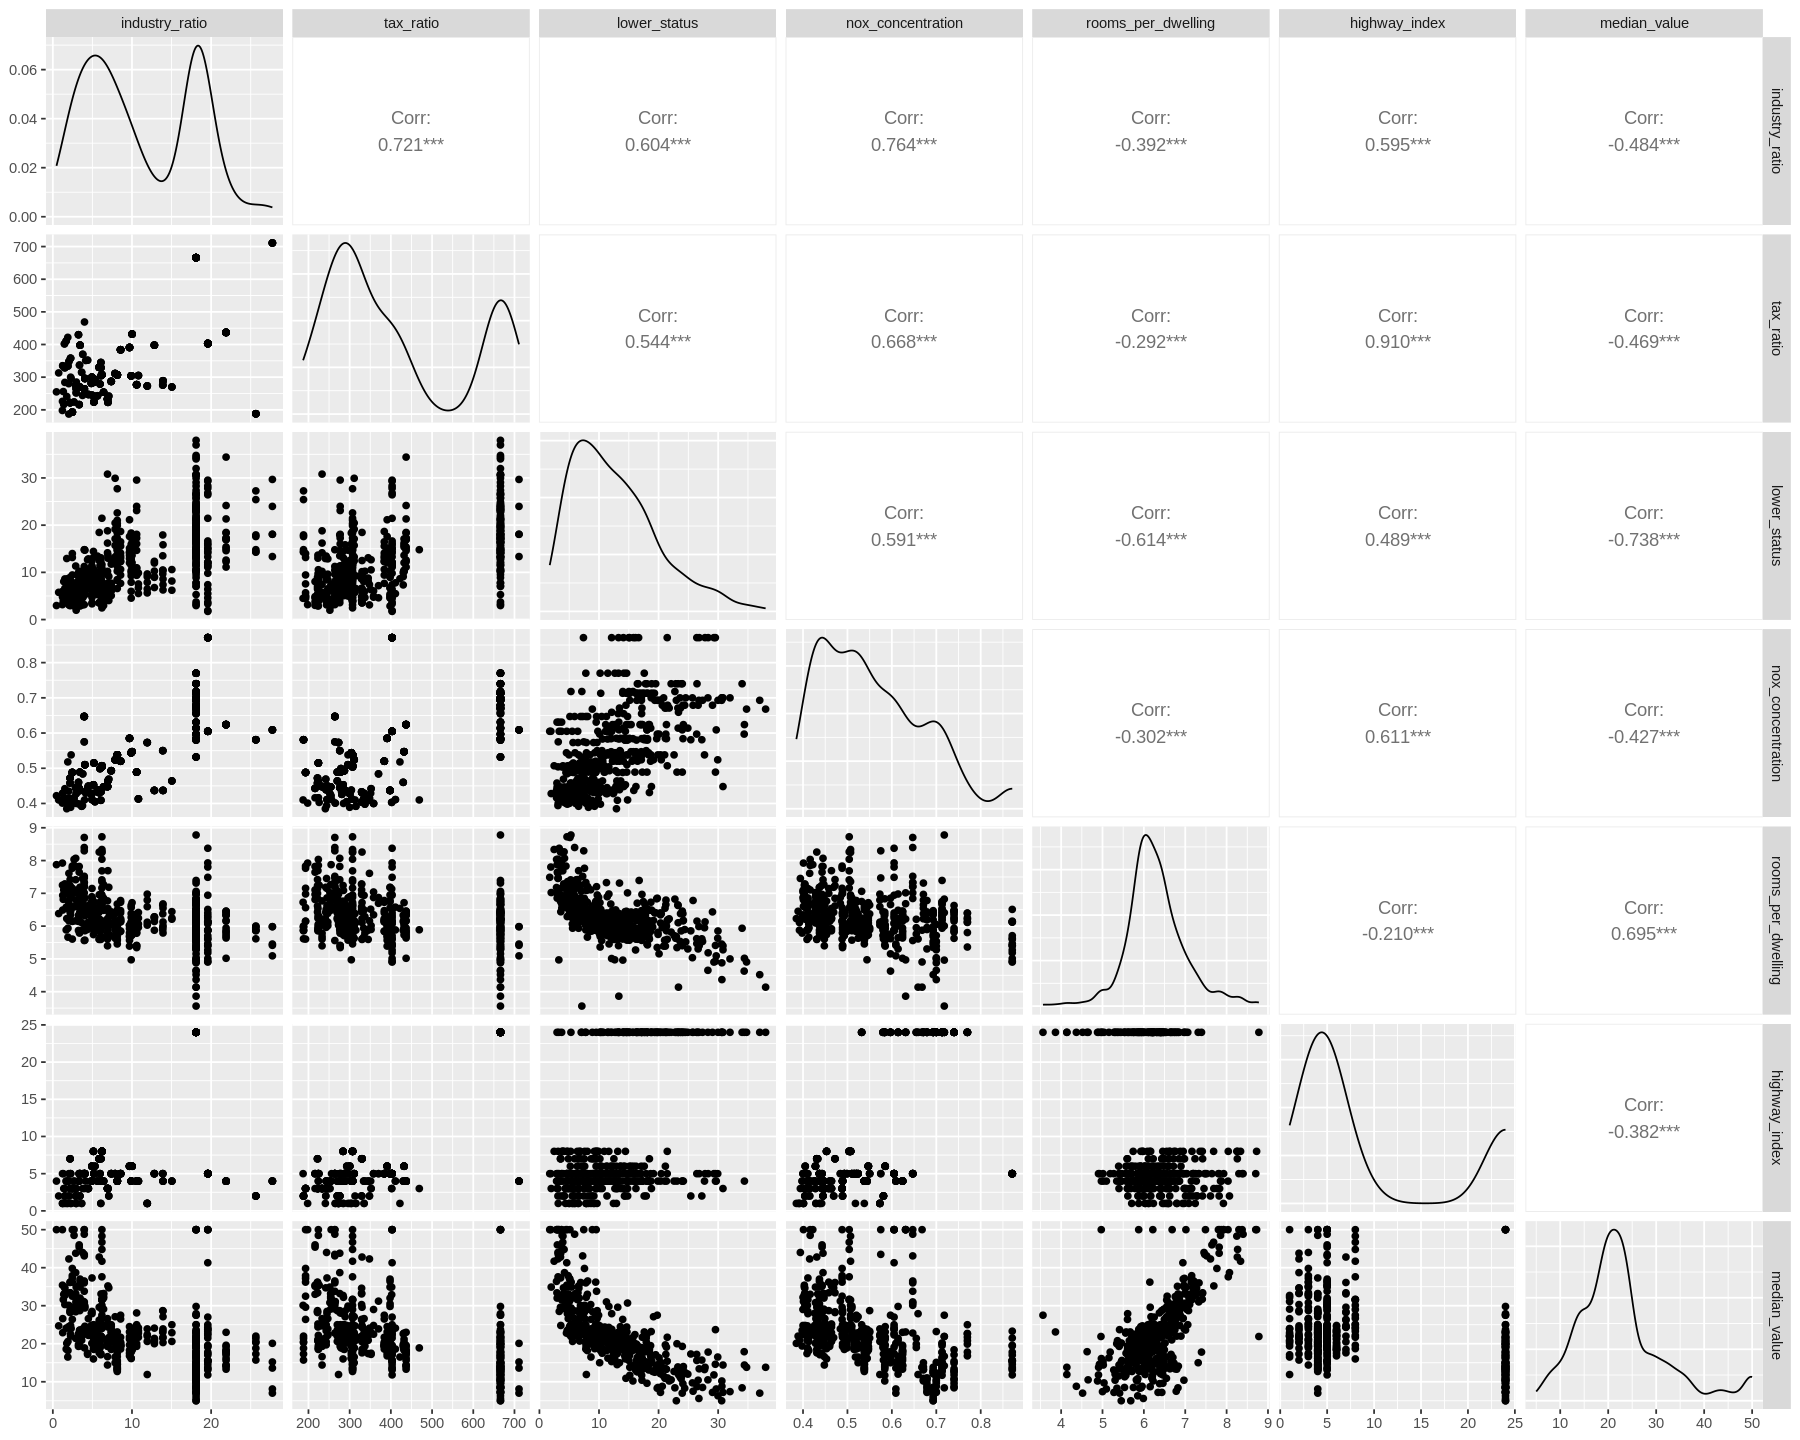

In [ ]:
selected_variables <- c("industry_ratio", "tax_ratio", "lower_status", "nox_concentration", "rooms_per_dwelling", "highway_index", "median_value")
data_boston_preml <- data_boston[, selected_variables]

cor_matrix <- cor(data_boston_preml)

print(round(cor_matrix, 2))
ggpairs(data_boston_preml)


Remove Outliers

In [ ]:
selected_variables <- c("industry_ratio", "tax_ratio", "lower_status", "nox_concentration", "rooms_per_dwelling", "highway_index", "median_value")
data_boston_preml <- data_boston[, selected_variables]

# Identificar i tractar outliers amb la regla IQR i aplicar la transformació logarítmica
for (variable in selected_variables) {
  Q1 <- quantile(data_boston_preml[, variable], 0.25)
  Q3 <- quantile(data_boston_preml[, variable], 0.75)
  IQR <- Q3 - Q1

  lower_limit <- Q1 - 1.5 * IQR
  upper_limit <- Q3 + 1.5 * IQR

  # Identificar outliers
  outliers <- data_boston_preml[, variable] < lower_limit | data_boston_preml[, variable] > upper_limit

  # Tractar outliers: Eliminar-los i aplicar la transformació logarítmica
  data_boston_preml_clean <- subset(data_boston_preml, !outliers)
  data_boston_preml_clean[, variable] <- log1p(data_boston_preml_clean[, variable])
}

# Actualitzar la matriu de correlació i mostrar-la
cor_matrix_clean <- cor(data_boston_preml_clean)
print(round(cor_matrix_clean, 2))

# Actualitzar la matriu de gràfics amb ggpairs
ggpairs(data_boston_preml_clean)


In [ ]:
data_boston_selected <- data_boston[, selected_variables]

# Training and test sets
set.seed(123)
inTrain <- createDataPartition(y = data_boston_preml_clean$median_value, p = 0.6, list = FALSE, times = 1)

data_train <- data_boston_preml_clean[inTrain, ] # Training data
data_test <- data_boston_preml_clean[-inTrain, ] # Test data


## Linear regression

In [ ]:
modelo_lm <- lm(median_value ~ industry_ratio + tax_ratio + lower_status + nox_concentration + rooms_per_dwelling + highway_index, data = data_train)
summary(modelo_lm)


Call:
lm(formula = median_value ~ industry_ratio + tax_ratio + lower_status + 
    nox_concentration + rooms_per_dwelling + highway_index, data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63579 -0.10160 -0.01155  0.09917  0.69582 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.9095117  0.1777794  16.366  < 2e-16 ***
industry_ratio      0.0017298  0.0029859   0.579    0.563    
tax_ratio          -0.0008396  0.0001960  -4.284 2.54e-05 ***
lower_status       -0.0197303  0.0025048  -7.877 7.83e-14 ***
nox_concentration  -0.2295987  0.1611539  -1.425    0.155    
rooms_per_dwelling  0.1286411  0.0240916   5.340 1.95e-07 ***
highway_index       0.0033965  0.0033227   1.022    0.308    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1835 on 275 degrees of freedom
Multiple R-squared:  0.708,	Adjusted R-squared:  0.7016 
F-statistic: 111.1 on 6 and 275 DF,  p-valu

Normality


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  modelo_lm$residuals
D = 0.059466, p-value = 0.01749


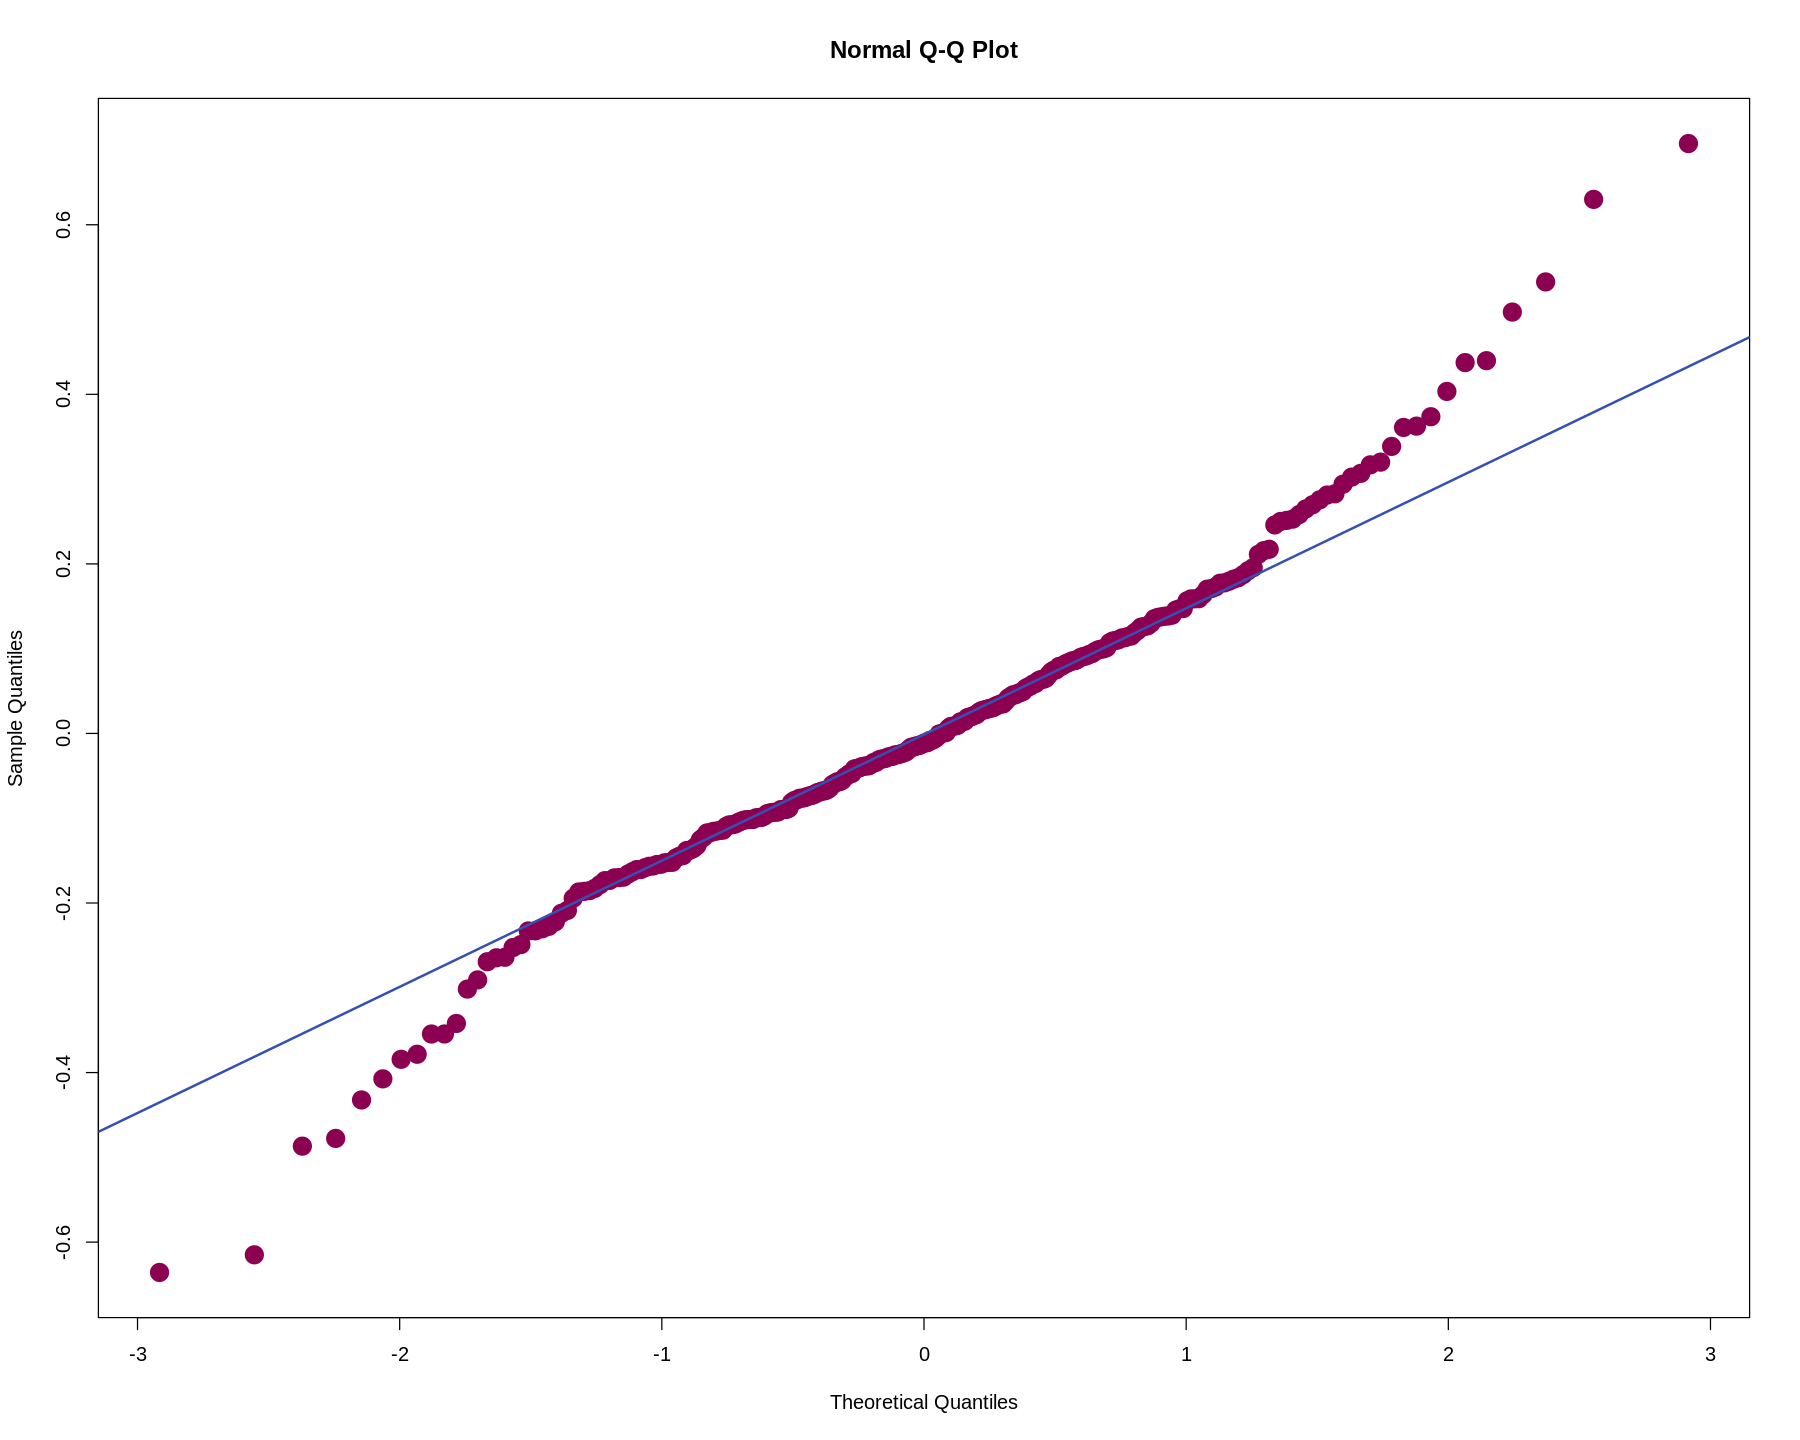

In [ ]:
qqnorm(modelo_lm$residuals, pch = 19, col = "#8c0052", cex = 2)
qqline(modelo_lm$residuals, col = "#3650b2", lwd = 2)
lillie.test(modelo_lm$residuals)


El resultat del test de normalitat de Lilliefors (Kolmogorov-Smirnov) suggereix que, malgrat haver eliminat els outliers i aplicat una transformació a les dades, les residuals del model de regressió lineal encara no segueixen una distribució normal.

Homoscedasticity


	studentized Breusch-Pagan test

data:  modelo_lm
BP = 37.832, df = 6, p-value = 1.212e-06


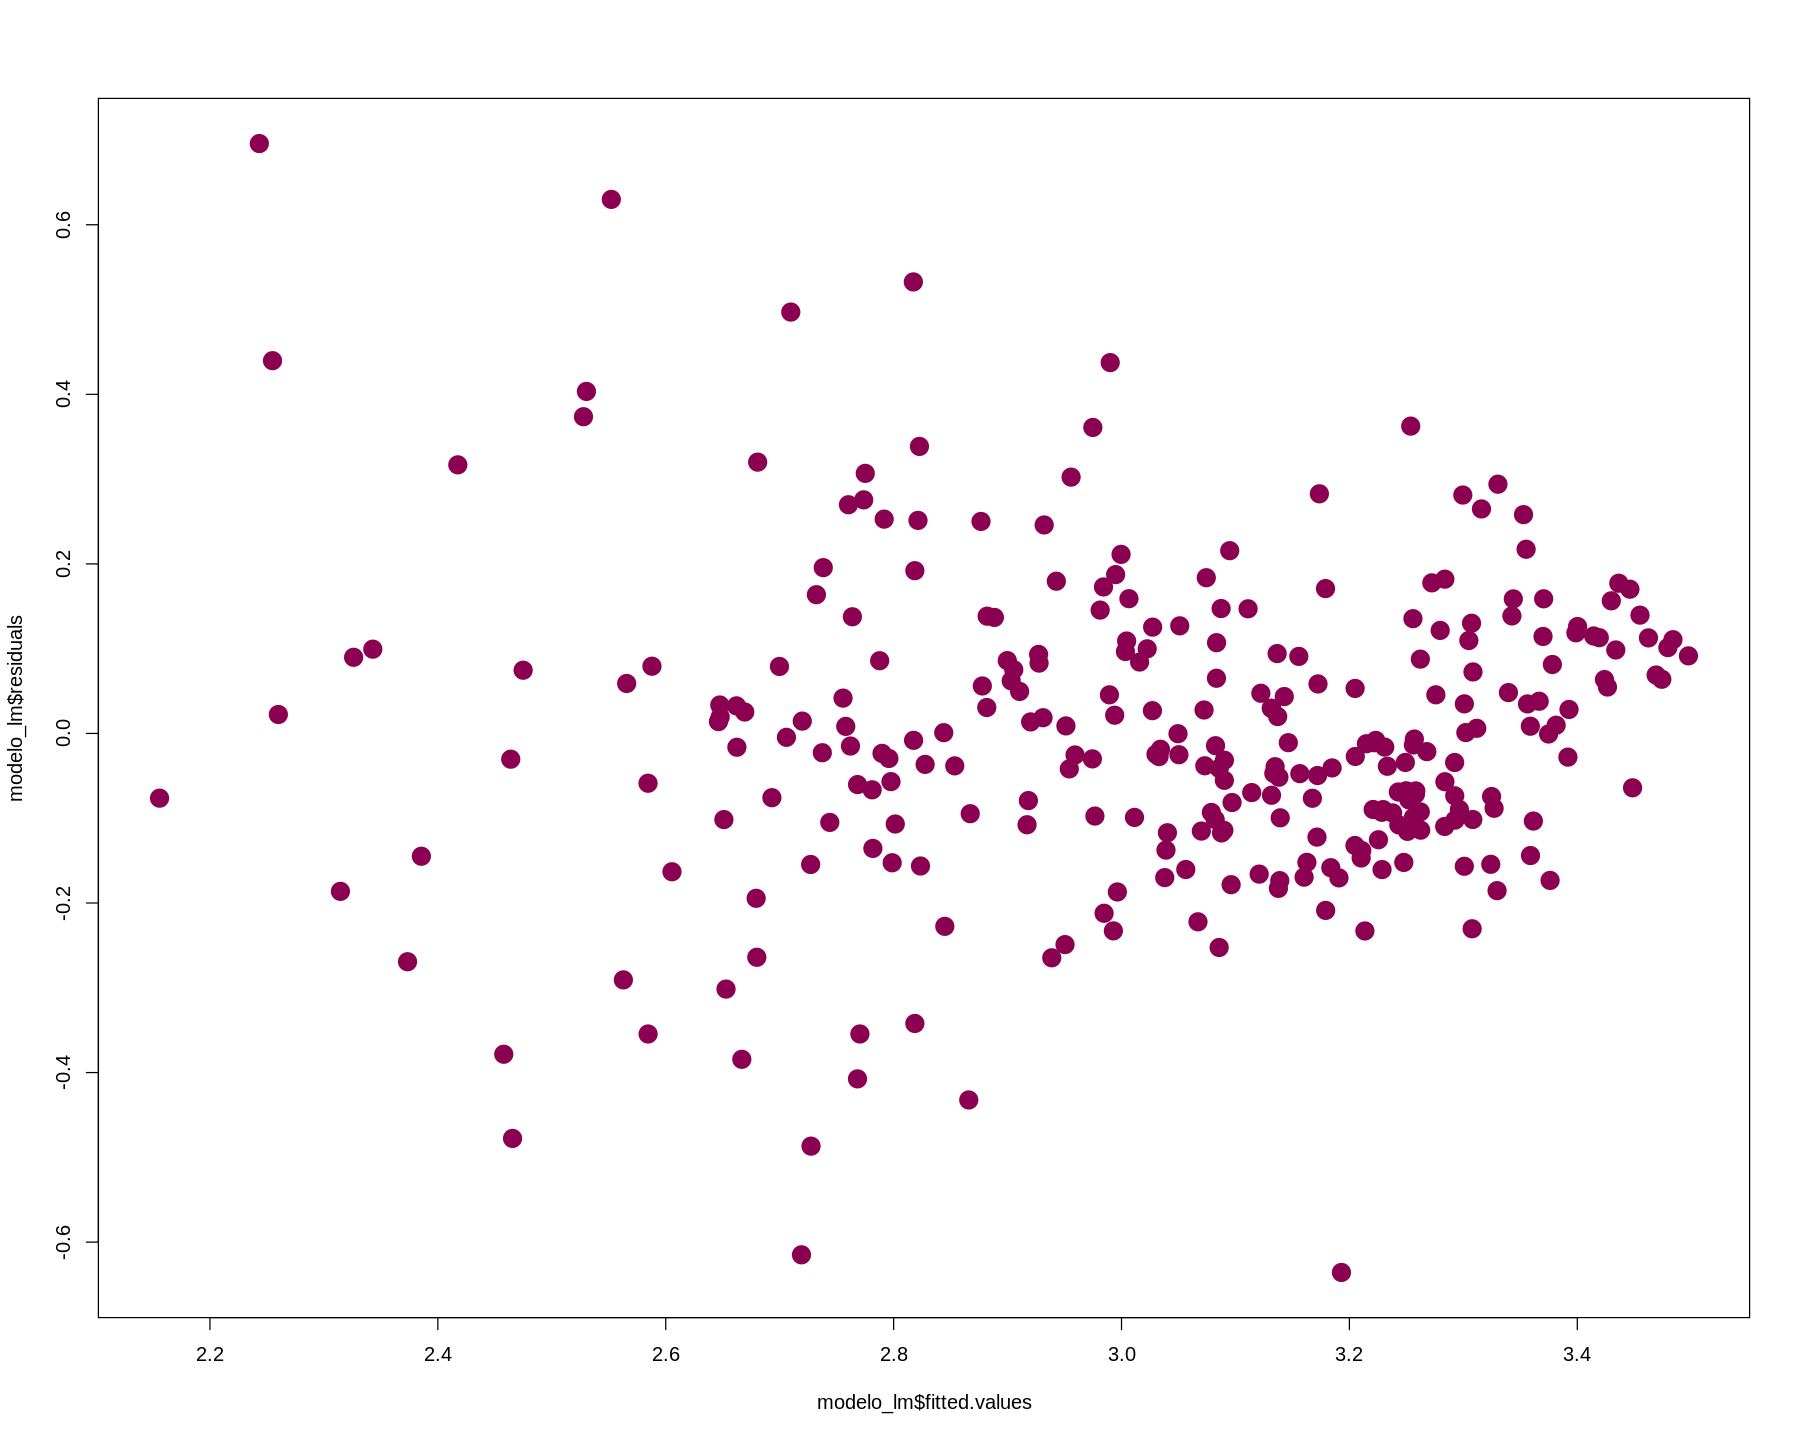

In [ ]:
plot(modelo_lm$fitted.values, modelo_lm$residuals, pch = 19, col = "#8c0052", cex = 2)
bptest(modelo_lm)

Ja que el p-valor és inferior al nivell de significança de 0.05, podem rebutjar la hipòtesi nul·la que els residus del model són homocedàstics.




Autocorrelation


	Durbin-Watson test

data:  modelo_lm
DW = 1.0451, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


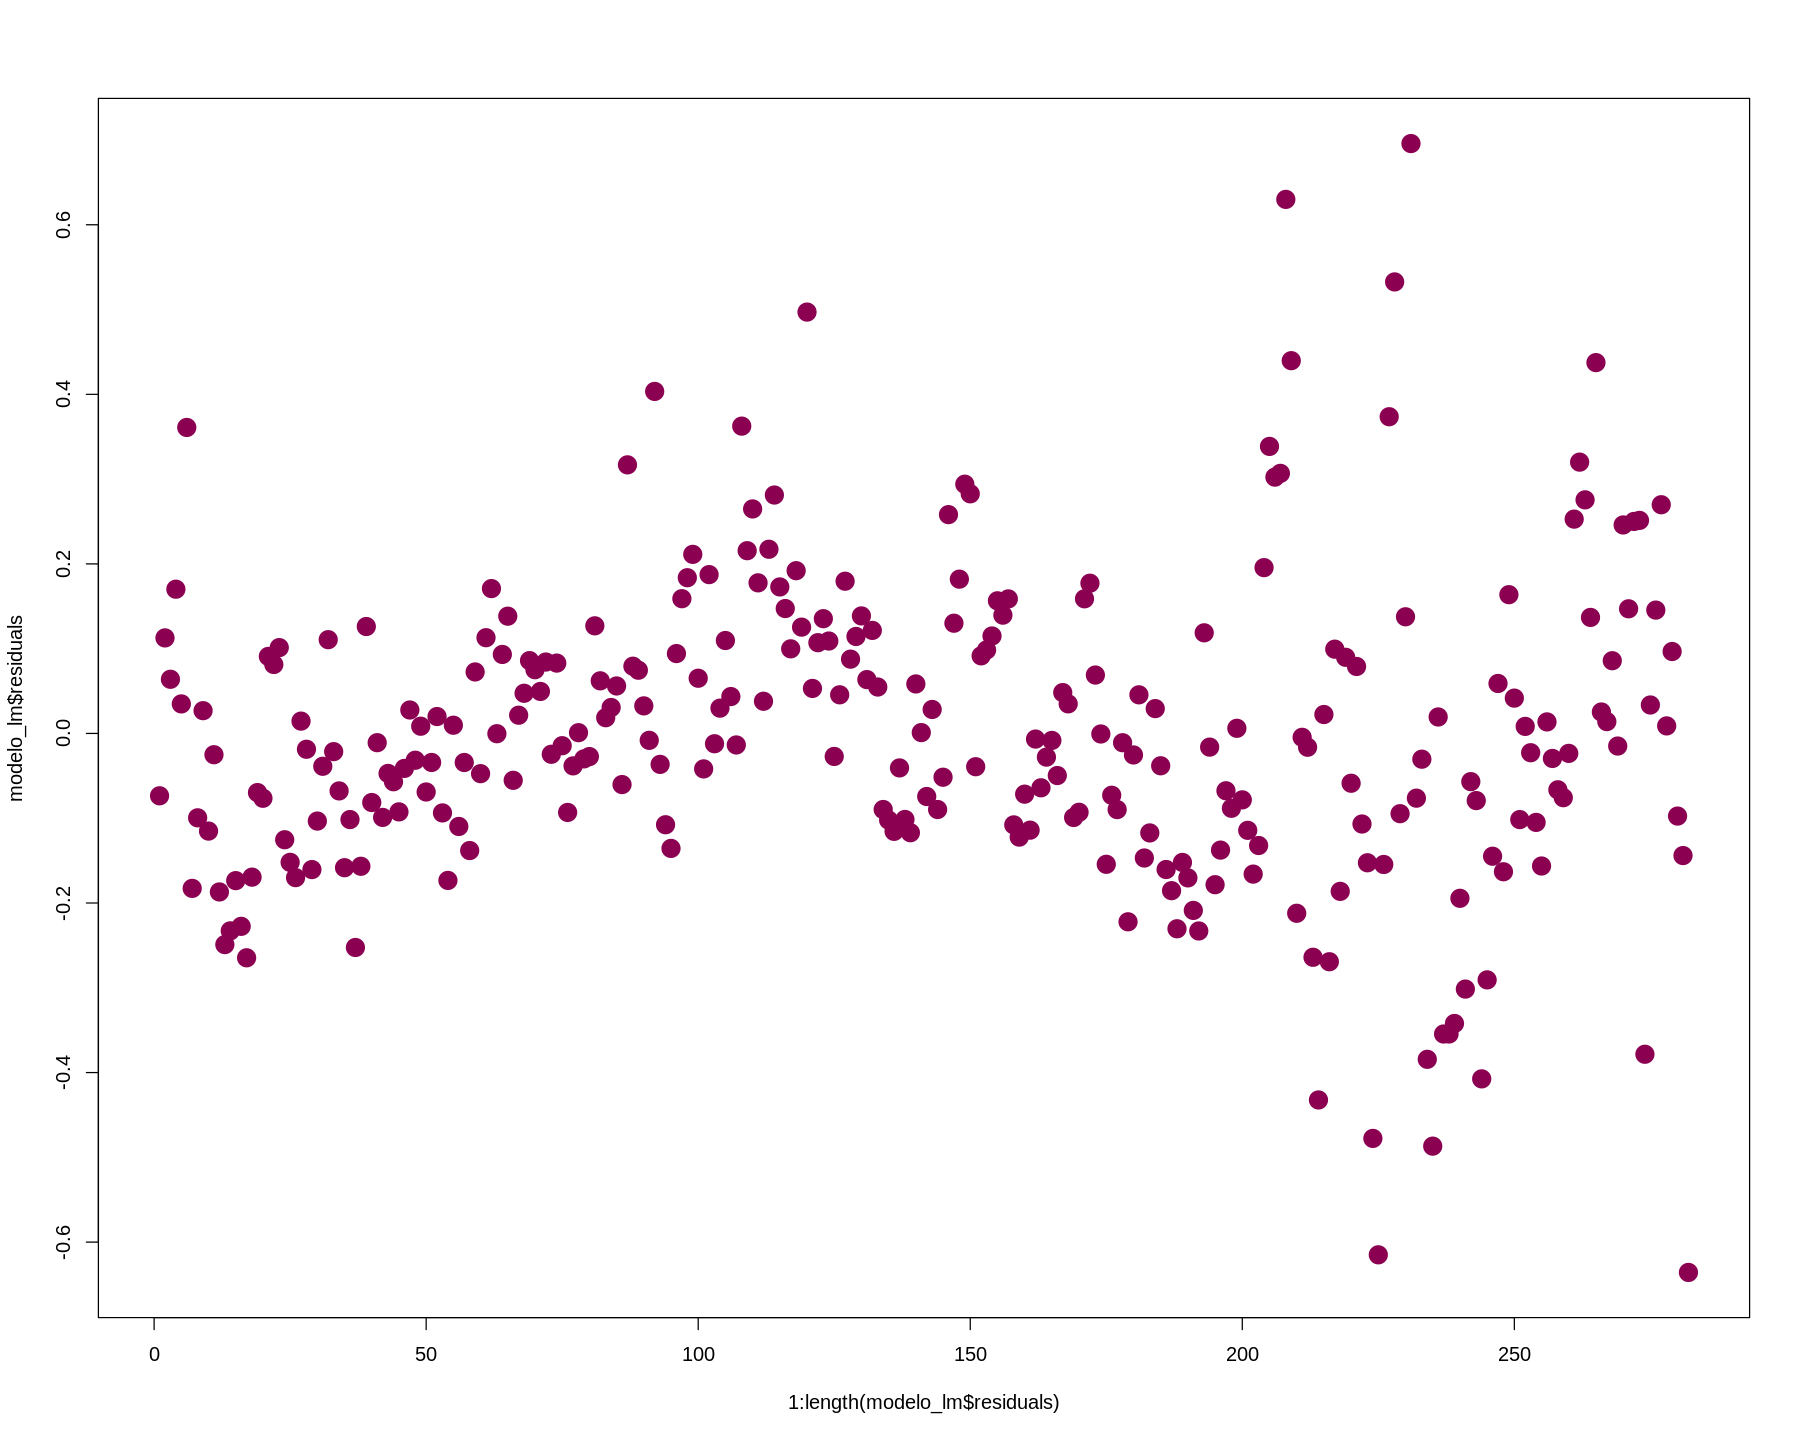

In [ ]:
plot(1:length(modelo_lm$residuals), modelo_lm$residuals, pch = 19, col = "#8c0052", cex = 2)
dwtest(modelo_lm, alternative = c("two.sided"))

El resultat del test de Durbin-Watson suggereix que hi ha evidència estadística per rebutjar la hipòtesi nul·la que l'autocorrelació real és zero.

In [ ]:
# Mean of residuals
mean(modelo_lm$residuals)

[1] 1.635515e-17

In [ ]:
library(broom)


[1] 0.2862429

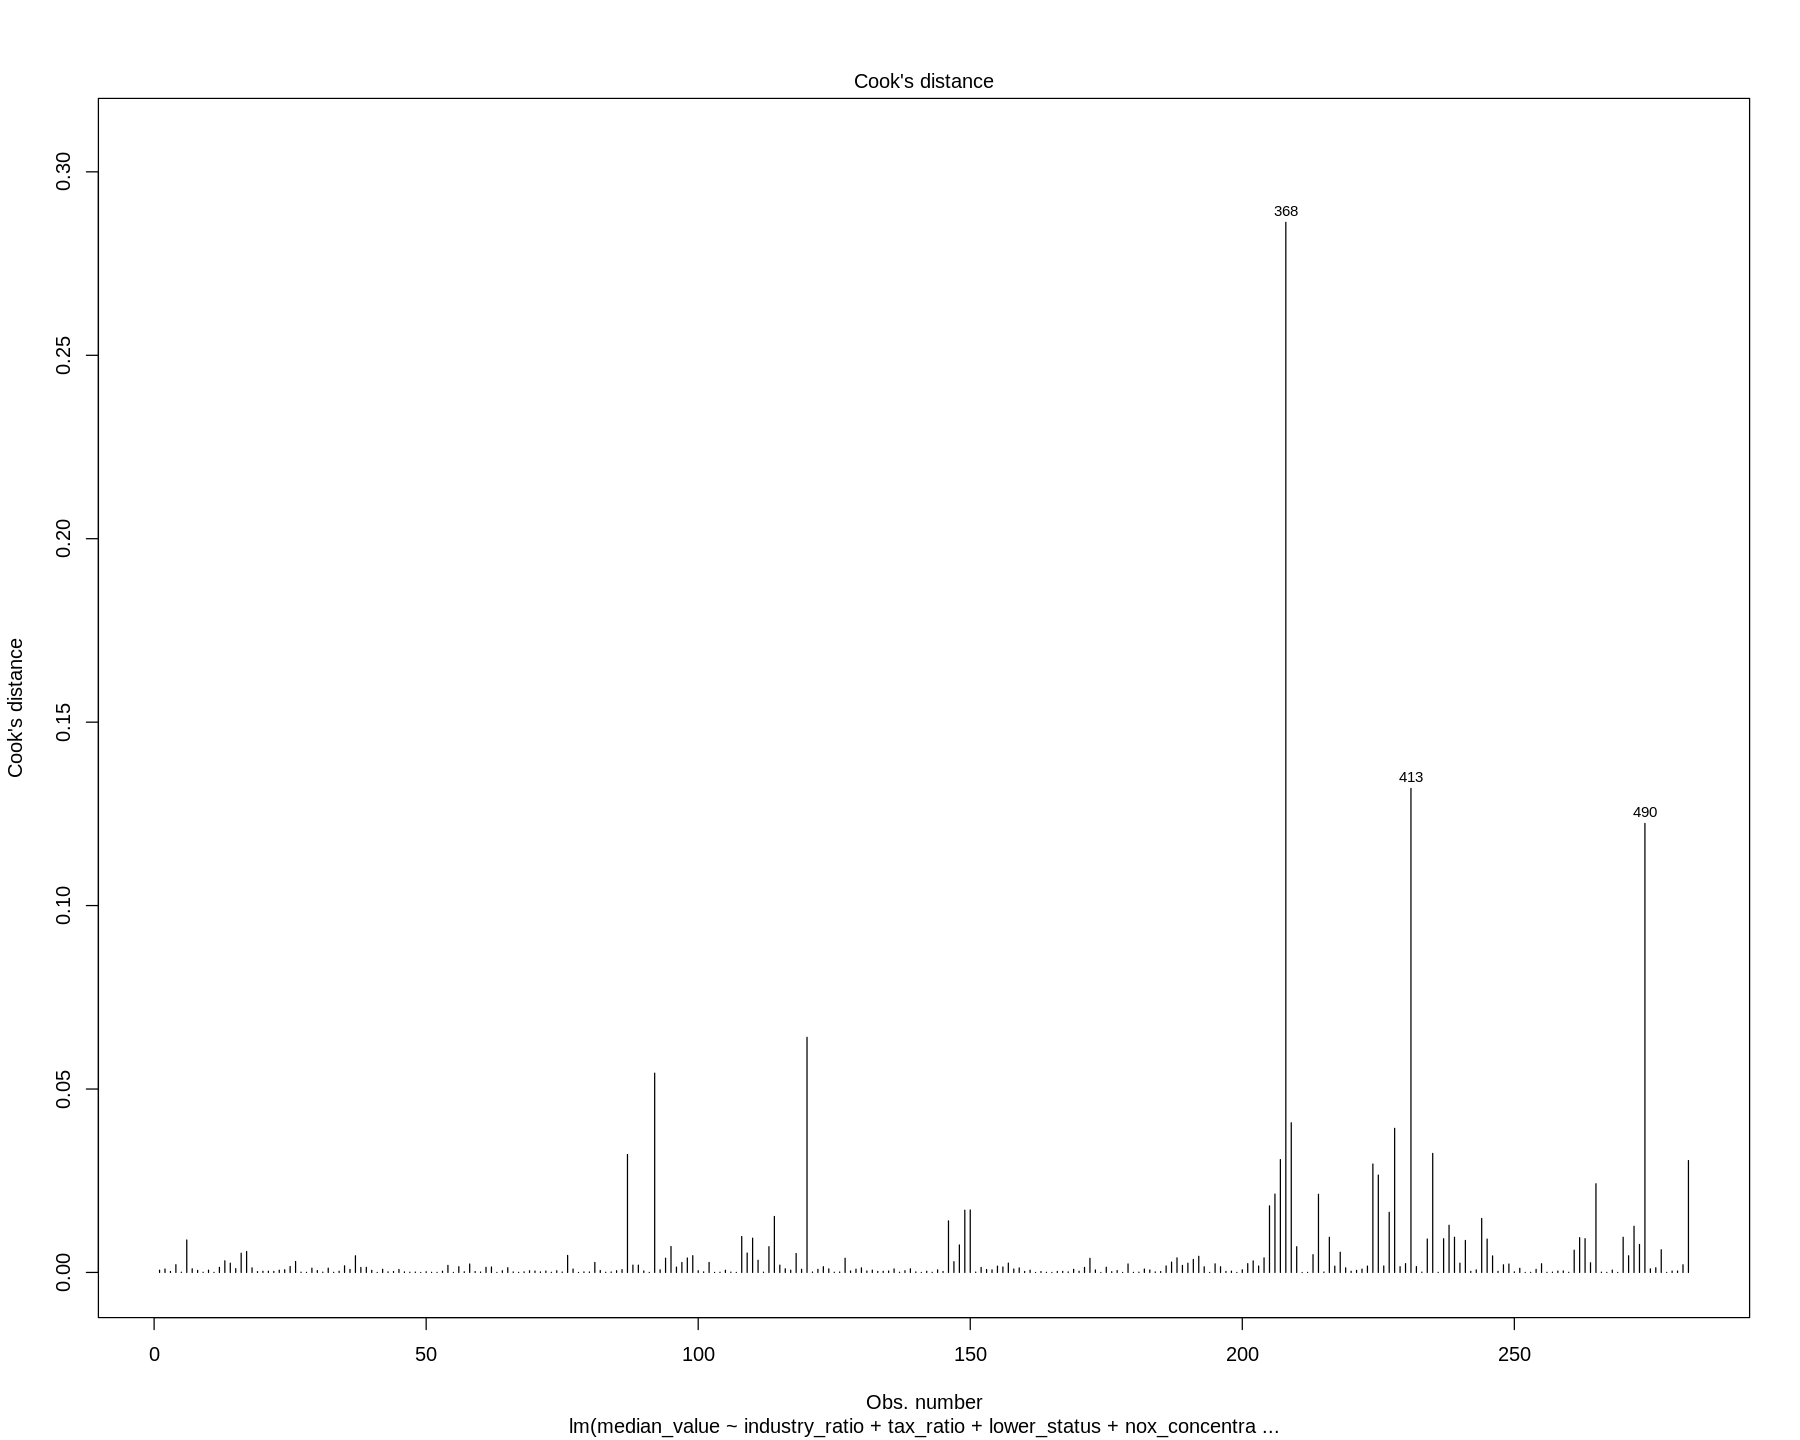

In [ ]:
# Cook's distance plot model_pctbachdeg25_over
plot(modelo_lm, 4)

modelo_lm_clean <- na.omit(modelo_lm)
cooks_distance <- cooks.distance(modelo_lm_clean)
max(cooks_distance)

El valor màxim de la distància de Cook per al model és 0.286242867674891.

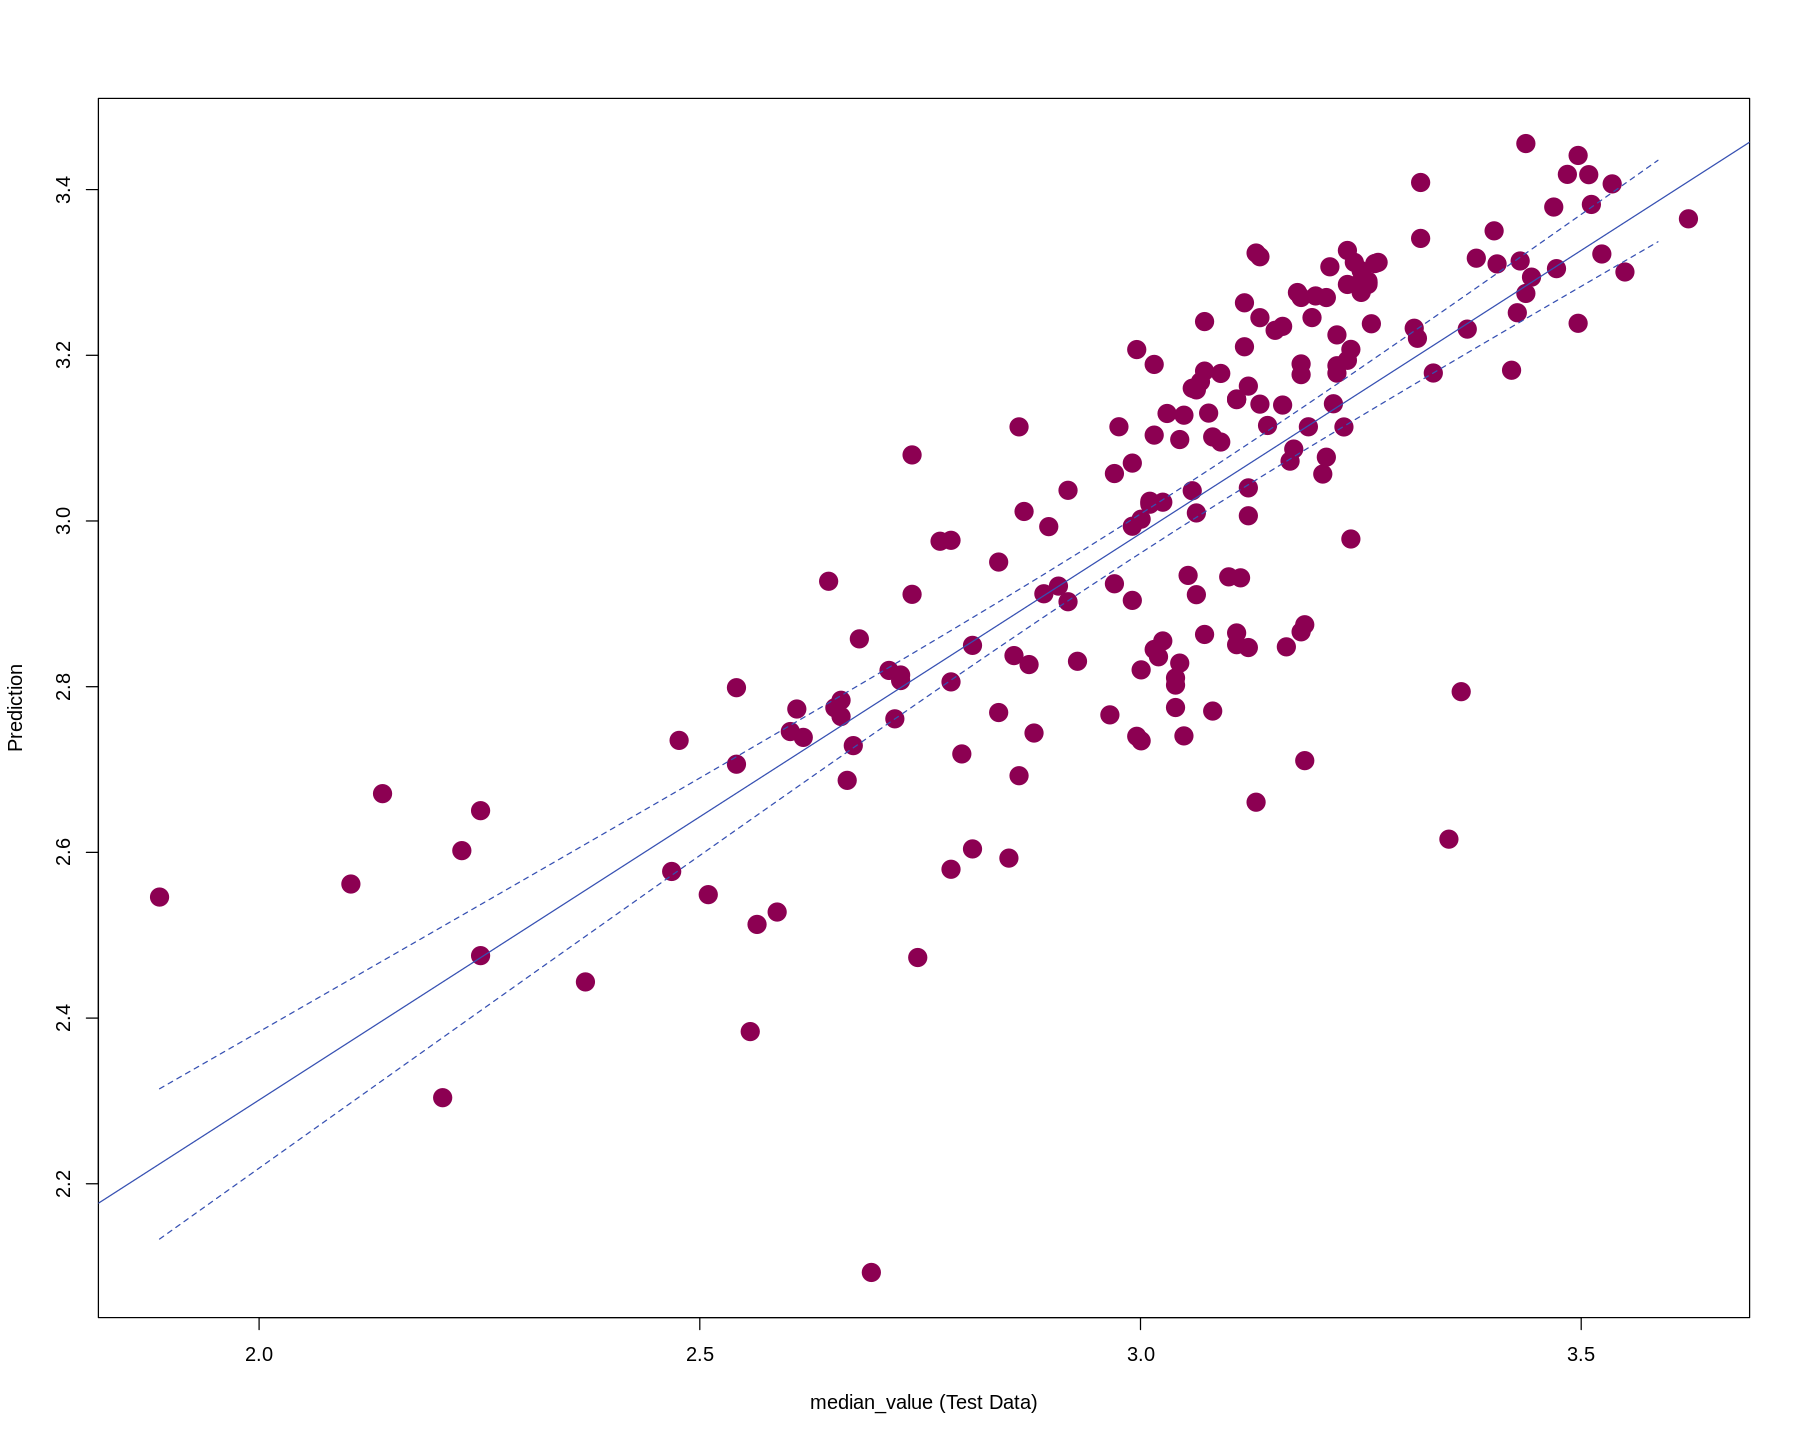

In [ ]:
# Predictions
prediction <- predict(modelo_lm, data_test)

plot(data_test$median_value, prediction, xlab = "median_value (Test Data)", ylab = "Prediction", pch = 19, col = "#8c0052", cex = 2)
lm.out <- lm(prediction ~ median_value, data = data_test)
newx <- seq(min(data_test$median_value), max(data_test$median_value), by = 0.05)
conf_interval <- predict(lm.out, newdata = data.frame(median_value = newx), interval = "confidence", level = 0.95)
abline(lm.out, col = "#3650b2")
lines(newx, conf_interval[, 2], col = "#3650b2", lty = 2)
lines(newx, conf_interval[, 3], col = "#3650b2", lty = 2)


In [ ]:
# Mesures estadístiques
data.frame(R2 = R2(prediction, data_test$median_value),
           RMSE = RMSE(prediction, data_test$median_value),
           MAE = MAE(prediction, data_test$median_value))

R2,RMSE,MAE
<dbl>,<dbl>,<dbl>
0.6281102,0.188915,0.1409767


**R2 (coeficient de determinació):**
S'obté un valor de 0.6281, el que significa que el 62.81% de la variabilitat de la variable "median_value" es pot explicar pel model.

**RMSE (Error Quadràtic Mitjà): **Aquesta mètrica mesura la mitjana de les diferències al quadrat entre les prediccions i els valors reals. Amb un valor de 0.188915, Valors més baixos indiquen un millor ajust del model als punts de dades.

**MAE (Error Absolut Mitjà):** Aquesta mètrica mesura la mitjana de les diferències absolutes entre les prediccions i els valors reals. Amb un valor de 0.1409767, un valor més baix indica una millor precisió.

En resum, les mesures suggereixen que el model de regressió té un ajust moderadament bo als nous punts de dades, ja que el coeficient de determinació (R2) és relativament alt, i els errors mitjans (RMSE i MAE) són també moderadament baixos.

En general, el model sembla tenir un bon rendiment en la predicció de la variable "**median_value**", ja que les mètriques d'avaluació són moderadament baixes.

L'ús del model en la vida real dependrà fortament del context en què es vulgui aplicar i dels requisits específics del problema. Les mètriques obtingudes no són òptimes, però tampoc són  molt deficientes tenim u 62%. No obstant això, es recomana explorar altres mètodes i tècniques, ja que les dades no segueixen una distribució normal. Aquesta exploració pot ajudar a millorar la precisió del model i proporcionar una visió més completa del comportament dels predictors en relació amb la variable objectiu. Una validació més exhaustiva i ajustaments addicionals podrien ser necessaris per assegurar un millor rendiment en situacions reals.